# [CONFIG] Configuração básica

## Básicos (numpy, pandas, math, display, locale, time, random, json, regex)

In [87]:
# !python -m pip install pandas
# !python -m pip install openpyxl
# !python -m pip install xlrd
# !python -m pip install jupyter
# !python -m pip install numpy
# # !python -m pip install random
# !python -m pip install IPython
# !python -m pip install json
# # !sudo dpkg-reconfigure locales
# !python -m pip install regex


from IPython.display import display
import json
import pandas as pd
import math
import numpy as np
import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
import random

import regex as re

## Visualização (matplotlib, seaborn)

In [88]:
# !python -m pip install matplotlib
# !python -m pip install seaborn

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import seaborn as sns

## Web (BeautifulSoup, requests)

In [89]:
# !python -m pip install BeautifulSoup
from bs4 import BeautifulSoup

In [90]:
# !python -m pip install requests
import requests

## Drive (para ler e escrever arquivos)

In [91]:
from google.colab import drive
from google.colab import auth
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Previsão de resultados (sklearn)

In [92]:
# !python -m pip install sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

random_state_seed = 12345
np.random.seed(random_state_seed)

# import random
random.seed(random_state_seed)

# Funções

## Elimina colunas NA

In [93]:
def elimina_colunas_NA(
    base,
    imprime_colunas_vazias = False,
    imprime_colunas_completas = False,
    imprime_colunas_parciais = False,
    remove_da_base = True,
    retorna_parciais = False
    ):

    tamanho_da_base = len(base)

    colunas_vazias = []
    colunas_completas = []
    colunas_parciais = []

    for coluna in base.columns:
        tamanho_da_coluna = len(base[base[coluna].isna()])
        if tamanho_da_coluna == tamanho_da_base:
            # print(coluna)
            colunas_vazias.append(coluna)
        elif tamanho_da_coluna == 0:
            colunas_completas.append(coluna)
        else:
            colunas_parciais.append(coluna)

    if imprime_colunas_vazias == True:
        if len(colunas_vazias) == 0:
            print("Não há colunas NA")
        else:
            print("Colunas vazias: " + str(colunas_vazias))

    if imprime_colunas_completas == True:
        if len(colunas_completas) == 0:
            print("Não há colunas completas")
        else:
            print("Colunas completas: " + str(colunas_completas))

    if imprime_colunas_parciais == True:
        if len(colunas_parciais) == 0:
            print("Não há colunas parciais")
        else:
            print("Colunas parciais: " + str(colunas_parciais))

    if remove_da_base == True:
        base = base.drop(colunas_vazias, axis = 1)

    if retorna_parciais == True:
        return [base, colunas_parciais]
    else:
        return base

## Agrupar cada coluna

In [94]:
def agrupamento_cada_coluna(
    bd,
    coluna_completa,
    colunas_ignoradas = [],
    ascending = False,
    imprime_tabelas = True,
    ):

    from IPython.display import display

    campos_com_erro = []
    dict_campos = {}

    colunas = bd.columns.drop(coluna_completa)

    if len(colunas_ignoradas) > 0:
        colunas = colunas.drop(colunas_ignoradas)

    for coluna in colunas:
        try:
            temp_coluna = bd.fillna("(vazio)").groupby(coluna).count()[[coluna_completa]].rename(columns = {coluna_completa: "Quantidade"}).sort_values("Quantidade", ascending = ascending)

            if ascending == False:
                temp_coluna["%"] = temp_coluna["Quantidade"]/temp_coluna["Quantidade"].sum()
                temp_coluna["% acumulado"] = temp_coluna["%"].cumsum()

            if imprime_tabelas == True:
                display(temp_coluna)

            dict_campos[coluna] = temp_coluna
            limpa(temp_coluna)

        except:
            campos_com_erro.append(coluna)
            #print("Campo " + coluna + " deu erro =/")

    return [campos_com_erro, dict_campos]

## Análise exploratória básica

In [95]:
def analise_exploratoria(
    bd,
    imprime_todas_colunas = False,
    imprime_info_colunas = True,
    imprime_colunas_vazias = False,
    imprime_colunas_completas = False,
    imprime_colunas_parciais = False,
    remove_da_base = True,
    retorna_parciais = False,
    detalhar_colunas_parciais = True,
    colunas_ignoradas = []
    ):

    # COMEÇANDO PELAS COLUNAS DISPONÍVEIS E INFO
    if imprime_todas_colunas == True:
        display(bd.columns)

    if imprime_info_colunas == True:
        for i in range(int(np.ceil(len(bd.columns)/20))):
            display(bd.iloc[:, (i*20):min((i+1)*20, len(bd.columns))].info())

    # DETALHAMENTO DE QUAIS COLUNAS SÃO NA OU PARCIAIS
    if retorna_parciais == True:
        [bd_semNA, colunas_parciais] = elimina_colunas_NA(
            bd,
            imprime_colunas_vazias = imprime_colunas_vazias,
            imprime_colunas_completas = imprime_colunas_completas,
            imprime_colunas_parciais = imprime_colunas_parciais,
            remove_da_base = remove_da_base,
            retorna_parciais = retorna_parciais
        )

        if detalhar_colunas_parciais == True:
            for coluna in colunas_parciais:
                print("# " + coluna + ": " + str(len(colunas_parciais[colunas_parciais[coluna].isna()])))
    else:
        colunas_parciais = []

        bd_semNA = elimina_colunas_NA(
            bd,
            imprime_colunas_vazias = imprime_colunas_vazias,
            imprime_colunas_completas = imprime_colunas_completas,
            imprime_colunas_parciais = imprime_colunas_parciais,
            remove_da_base = remove_da_base,
            retorna_parciais = retorna_parciais
        )

    [campos_com_erro, colunas_agrupadas] = agrupamento_cada_coluna(
        bd.reset_index(),
        coluna_completa = bd_semNA.drop(colunas_parciais, axis = 1).reset_index().columns[0],
        colunas_ignoradas = colunas_ignoradas
    )

    if retorna_parciais == True:
        return [bd_semNA, colunas_parciais, colunas_agrupadas, campos_com_erro]
    else:
        return [bd_semNA, colunas_agrupadas, campos_com_erro]

## Completa dígitos (padronizar chaves, CPF, etc)

In [96]:
def completa_digitos(texto, qtd):
    quantidade_zeros = qtd - len(texto)

    contador = quantidade_zeros
    while contador > 0:
        texto = "0" + texto
        contador = contador - 1

    # print(len(texto))

    return texto

## Exemplo de uso
# df["coluna_nova"] = df.apply(lambda x: completa_digitos(x["coluna_referencia"], 2), axis = 1)

## Histograma padrão

In [97]:
def histograma_padrao(
  dados_x,
  titulo = np.nan,
  dados_indice = np.nan,
  tipo = "hist",
  grid = False,
  legend = True,
  linha_media = np.nan,
  qtd_bins = 10,
  espessura = 0.8,
  limite_x_min = np.nan, limite_x_max = np.nan,
  limite_y_min = np.nan, limite_y_max = np.nan,
  ):

  plt.figure(figsize = (20,8))

  if not(pd.isnull(titulo)):
      plt.title(titulo, fontsize = 16)

  if tipo == "hist":
      n, bins, edges = plt.hist(
          dados_x,
          bins = qtd_bins,
          rwidth = espessura
          )
      plt.xticks(bins)

  elif tipo == "bar":
      plt.bar(
          dados_indice,
          dados_x,
          width = espessura
          )



  if not(math.isnan(linha_media)):
      plt.axvline(x=linha_media, color = "black", label='Média')

  if legend == True:
      plt.legend()

  plt.grid(grid)

  if (not(math.isnan(limite_x_max))) & (not(math.isnan(limite_x_min))):
      # print(limite_x_min)
      # print(~math.isnan(limite_x_max))
      plt.xlim(limite_x_min, limite_x_max)

  if (not(math.isnan(limite_y_max))) & (not(math.isnan(limite_y_min))):
      plt.ylim(limite_y_min, limite_y_max)

  plt.show()

## Gráfico com rótulos

In [486]:
def grafico_com_rotulos(
    dados, coluna_x, coluna_y,
    tipo_grafico = "bar", titulo_grafico = "", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1, cor_barra = "b",
    cor_x = "b", rotacao_x = 0,
    formato_eixo_x = "{x:.2f}", formatador_eixo_x = matplotlib.ticker.StrMethodFormatter, locator_eixo_x = matplotlib.ticker.AutoLocator(),
    formato_eixo_y = "{x:.2f}",
    formato_y = "{:.2f}", rotacao_y = 0, limite_min_y = None, limite_max_y = None,
    xytext_label_y = (0,10),
  ):
  import matplotlib
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  # import matplotlib.ticker as ticker

  # dados_plot = dados_cliente[dados_cliente["% Faturamento Acumulado"] < 0.40]

  if fig is None:
    fig = plt.figure(figsize = tamanho_grafico)

  plt.clf()
  plt.rcParams.update({'font.size': tamanho_fonte})


  ys = dados[coluna_y]
  # xs = np.arange(len(dados[coluna_x]))
  xs = dados[coluna_x]

  if (tipo_grafico == "bar") | (tipo_grafico == "line"):
    if (tipo_grafico == "bar"):
      plt.bar(
          x = xs,
          height = ys,
          width = grossura_barra,
          label = coluna_y,
          color = cor_barra,
      )
    elif (tipo_grafico == "line"):
      plt.plot(
        xs,
        ys,
        cor_x + "o-",
        label = coluna_y,
      )

    # display(cor_x + "o-")

    ax1 = plt.gca()
    if (limite_min_y is not None):
      if (limite_max_y is not None):
        ax1.set_ylim([min(dados[coluna_y])*limite_min_y, max(dados[coluna_y])*limite_max_y])
      else:
        ax1.set_ylim([min(dados[coluna_y])*limite_min_y, None])
    elif (limite_min_y is None):
      if (limite_max_y is not None):
        ax1.set_ylim([None, max(dados[coluna_y])*limite_max_y])

    ax1.set_ylabel(coluna_y, color = cor_x)
    ax1.set_xlabel(coluna_x)

    for x,y in zip(xs,ys):
        label = formato_y.format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext = xytext_label_y, # distance from text to points (x,y)
                    ha='center', # horizontal alignment can be left, right or center
                    color = cor_x,
                    rotation = rotacao_y)


        ax1.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(formato_eixo_y))

    # fig.legend()
    ax1.xaxis.set_tick_params(rotation = rotacao_x)
    ax1.xaxis.set_major_locator(locator_eixo_x)
    ax1.xaxis.set_major_formatter(formatador_eixo_x(formato_eixo_x))
    # plt.xticks(xs, dados[coluna_x])

  elif tipo_grafico == "barh":
    plt.barh(
        y = xs,
        width = ys,
        height = grossura_barra,
        # label = coluna_y,
        color = cor_barra,
    )
    ax1 = plt.gca()
    ax1.set_yticks(xs, dados[coluna_x])

    ax1.set_ylabel(coluna_x)
    ax1.set_xlabel(coluna_y, color = cor_x)
    ax1.invert_yaxis()

    if (limite_min_y is not None):
      if (limite_max_y is not None):
        ax1.set_xlim([min(dados[coluna_y])*limite_min_y, max(dados[coluna_y])*limite_max_y])
      else:
        ax1.set_xlim([min(dados[coluna_y])*limite_min_y, None])
    elif (limite_min_y is None):
      if (limite_max_y is not None):
        ax1.set_xlim([None, max(dados[coluna_y])*limite_max_y])

    for x,y in zip(xs,ys):
      label = formato_y.format(y)

      plt.annotate(label, # this is the text
                (y, x), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext = (xytext_label_y[1], xytext_label_y[0]), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                color = cor_x,
                rotation = rotacao_y)

    ax1.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(formato_eixo_y))

  plt.title(titulo_grafico)
  plt.show()

## Funções específicas

### Leitura Torneio com Rodadas, turno e returno

In [100]:
def leitura_dados_torneio_rodadas(
    url,
    qtd_rodadas,
    nome_torneio,
    var_ida_volta = True,
):
  # Initialize a list to store the extracted data
  lista_resultado = []

  for i in range(qtd_rodadas):
    # print(i+1)
    rodada = str(i+1)
    print("Leitura da Rodada: " + rodada)

    torneio_url = url + rodada
    torneio_response_rodada = requests.get(torneio_url)

    # Create a BeautifulSoup object with the HTML content
    torneio_soup_rodada = BeautifulSoup(torneio_response_rodada.content, 'html.parser')
    # torneio_soup_rodada

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Torneio.html', "w") as file:
    #   file.write(str(torneio_soup_rodada))

    torneio_jogos_rodada = torneio_soup_rodada. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"]) # find_all("tr", class_=lambda s: "even" in s or "odd" in s)

    ida_ou_volta = "Ida"

    for jogo in torneio_jogos_rodada:
      # O site tem uma tag a mais "Previsão" para jogos que não rolaram ainda
      posicao = 0
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      try:
        data_jogo = jogo.find("td", class_="darker tipsy-active nowrap").get("title")
      except:
        data_jogo = jogo.find("td", class_="darker tipsy-active nowrap gameinlive").get("title")

      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      resultado = jogo.find_all("a")[1 + posicao].text.strip()

      if var_ida_volta == True:
        if int(rodada) <= (qtd_rodadas/2):
          ida_ou_volta = "Ida"
        else:
          ida_ou_volta = "Volta"

      # Add the dictionary to the data list
      lista_resultado.append({
          'data_jogo': data_jogo,
          'link_jogo': link_jogo,
          'timeA_nome': timeA_nome,
          'timeB_nome': timeB_nome,
          'resultado': resultado,
          'fase': "Rodada " + rodada,
          'ida ou volta': ida_ou_volta,
          'torneio': nome_torneio,
      })

  # lista_resultado
  return lista_resultado

### Leitura de Torneio com mata-mata

In [124]:
def leitura_dados_torneio_matamata(
    var_urls_fases,
    var_nome_torneio,
    lista_fases_sem_ida_volta = [],
):
  # var_urls_fases = {
    # "1ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/9jJzZx4k6ZR0v",
    # "2ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/pqdPZDeldm81J",
    # "3ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/XaBgZEr4jmE2J",
    # "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/l2RBY0rPWmw0J",
    # "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/3l2OZXjxRQ7Wb",
    # "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/R8oPZrvDvZyJd",
  # }

  # Initialize a list to store the extracted data
  torneio_resultado = []

  # for i in var_urls_fases[0]:
  #   print(i + ": " + var_urls_fases[0][i])
  #   torneio_response_fase = requests.get(var_urls_fases[0][i])
  #   torneio_soup_fase = BeautifulSoup(torneio_response_fase.content, 'html.parser')
  #   nome_arquivo_exportacao = torneio_soup_fase + 'Torneio (' +  i + ').html'
  #   with open(nome_arquivo_exportacao, "w") as file:
  #     file.write(str(torneio_soup_fase))

  ida_ou_volta = "Ida"

  for fase in var_urls_fases:
    print("Leitura da Fase: " + fase)
    torneio_response_fase = requests.get(var_urls_fases[fase])

    torneio_soup_fase = BeautifulSoup(torneio_response_fase.content, 'html.parser')
    torneio_jogos_fase = torneio_soup_fase. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"])

    # display(torneio_jogos_fase[0:2])
    # display(len(torneio_jogos_fase))


    ida_ou_volta = "Ida"
    for jogo in torneio_jogos_fase:
      posicao = 0

      try:
        # display(jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title"))
        data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title")
      except:
        try:
          # display(jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title"))
          data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title")
        except:
          continue

      # # display(jogo)
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      # display(jogo.find_all("a")[3 + posicao].get("href"))
      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      # display(jogo.find_all("a")[0 + posicao].text.strip())
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      # display(jogo.find_all("a")[2 + posicao].text.strip())
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      # display(jogo.find_all("a")[1 + posicao].text.strip())
      resultado = jogo.find_all("a")[1 + posicao].text.strip()
      # print("")

      torneio_resultado.append({
            'data_jogo': data_jogo,
            'link_jogo': link_jogo,
            'timeA_nome': timeA_nome,
            'timeB_nome': timeB_nome,
            'resultado': resultado,
            'fase': fase,
            'ida ou volta': ida_ou_volta,
            'torneio': var_nome_torneio,
        })

      # display(ida_ou_volta)
      if (fase not in lista_fases_sem_ida_volta):
        if ida_ou_volta == "Ida":
          ida_ou_volta = "Volta"
        else:
          ida_ou_volta = "Ida"

      # torneio_resultado

  # Convert the data to a pandas DataFrame
  torneio_base_resultado = pd.DataFrame(torneio_resultado)

  # display(copabrasil_base_resultado.head())
  # display(copabrasil_base_resultado.tail())

  return torneio_base_resultado

### Tabela de pontos Brasileirão

In [102]:
def cria_tabela_brasileirao(
    base,
):

  # Estatísticas como mandante
  tabela_brasileirao_mandante_temp = base.groupby(["Time mandante (nome)", "Resultado jogo"]).count()[["Link para o jogo"]]
  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.join(
          base[["Time mandante (nome)", "Resultado jogo", "Gols mandante", "Gols visitante"]]. \
          groupby(["Time mandante (nome)", "Resultado jogo"]).sum()[["Gols mandante", "Gols visitante"]]
      ).reset_index()
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Empate", "Pontos"] = \
      1 * tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Empate", "Link para o jogo"]
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Mandante", "Pontos"] = \
      3 * tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Mandante", "Link para o jogo"]
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Visitante", "Pontos"] = 0

  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.rename(
      {"Link para o jogo": "Qtd jogos (como mandante)",
      "Time mandante (nome)": "Time",
      "Pontos": "Pontos (como mandante)",
      "Gols mandante": "Gols pró (como mandante)",
      "Gols visitante": "Gols contra (como mandante)",}, axis = 1)

  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.set_index(["Time", "Resultado jogo"])
  # tabela_brasileirao_mandante_temp


  # Estatísticas como visitante
  tabela_brasileirao_visitante_temp = base.groupby(["Time visitante (nome)", "Resultado jogo"]).count()[["Link para o jogo"]]
  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.join(
          base[["Time visitante (nome)", "Resultado jogo", "Gols mandante", "Gols visitante"]]. \
          groupby(["Time visitante (nome)", "Resultado jogo"]).sum()[["Gols mandante", "Gols visitante"]]
      ).reset_index()
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Empate", "Pontos"] = \
      1 * tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Empate", "Link para o jogo"]
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Visitante", "Pontos"] = \
      3 * tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Visitante", "Link para o jogo"]
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Mandante", "Pontos"] = 0

  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.rename(
      {"Link para o jogo": "Qtd jogos (como visitante)",
      "Time visitante (nome)": "Time",
      "Pontos": "Pontos (como visitante)",
      "Gols visitante": "Gols pró (como visitante)",
      "Gols mandante": "Gols contra (como visitante)",}, axis = 1)

  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.set_index(["Time", "Resultado jogo"])
  # tabela_brasileirao_visitante_temp


  # Totais
  tabela_brasileirao_temp = tabela_brasileirao_visitante_temp.join(tabela_brasileirao_mandante_temp, how = "outer").fillna(0).reset_index()

  # Pontos totais
  tabela_brasileirao_temp["Pontos (total)"] = tabela_brasileirao_temp["Pontos (como visitante)"] + tabela_brasileirao_temp["Pontos (como mandante)"]

  # Jogos totais
  tabela_brasileirao_temp["Qtd jogos (total)"] = tabela_brasileirao_temp["Qtd jogos (como visitante)"] + tabela_brasileirao_temp["Qtd jogos (como mandante)"]

  # Empates como mandante, como visitante e totais
  tabela_brasileirao_temp["Qtd empates (como mandante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Empate", "Qtd jogos (como mandante)"]
  tabela_brasileirao_temp["Qtd empates (como visitante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Empate", "Qtd jogos (como visitante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)
  tabela_brasileirao_temp["Qtd empates (total)"] = tabela_brasileirao_temp["Qtd empates (como mandante)"] + tabela_brasileirao_temp["Qtd empates (como visitante)"]


  # Derrotas totais
  tabela_brasileirao_temp["Qtd derrotas (como visitante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Mandante", "Qtd jogos (como visitante)"]
  tabela_brasileirao_temp["Qtd derrotas (como mandante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Visitante", "Qtd jogos (como mandante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)
  tabela_brasileirao_temp["Qtd derrotas (total)"] = tabela_brasileirao_temp["Qtd derrotas (como mandante)"] + tabela_brasileirao_temp["Qtd derrotas (como visitante)"]

  # Vitórias totais
  tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Mandante", "Qtd vitórias (total)"] = tabela_brasileirao_temp["Qtd jogos (como mandante)"]
  tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Visitante", "Qtd vitórias (total)"] = tabela_brasileirao_temp["Qtd jogos (como visitante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)

  # Gols totais
  tabela_brasileirao_temp["Gols pró"] = tabela_brasileirao_temp["Gols pró (como visitante)"] + tabela_brasileirao_temp["Gols pró (como mandante)"]
  tabela_brasileirao_temp["Gols contra"] = tabela_brasileirao_temp["Gols contra (como visitante)"] + tabela_brasileirao_temp["Gols contra (como mandante)"]

  # Tabela final
  tabela_brasileirao_final = tabela_brasileirao_temp.groupby("Time").sum(numeric_only = True) \
      [["Pontos (total)", "Qtd jogos (total)", "Qtd vitórias (total)", "Qtd empates (total)", "Qtd derrotas (total)", "Gols pró", "Gols contra"]]
  tabela_brasileirao_final["Saldo de gols"] = tabela_brasileirao_final["Gols pró"] - tabela_brasileirao_final["Gols contra"]
  tabela_brasileirao_final["% aproveitamento"] = tabela_brasileirao_final["Pontos (total)"]/(tabela_brasileirao_final["Qtd jogos (total)"]*3)
  tabela_brasileirao_final = tabela_brasileirao_final.sort_values(by = ["Pontos (total)", "Qtd vitórias (total)", "Saldo de gols", "Gols pró"], ascending = False)
  tabela_brasileirao_final = tabela_brasileirao_final.reset_index().reset_index()
  tabela_brasileirao_final["Posição"] = tabela_brasileirao_final["index"] + 1
  tabela_brasileirao_final = tabela_brasileirao_final.set_index("Posição").drop("index", axis = 1)

  return tabela_brasileirao_final

# Ler da pasta (caso já tenha sido lido dos sites antes)

## Variável global (reler dados)

In [103]:
# var_reler_dados = False
var_reler_dados = True

# var_reler_dados_tratados = False
var_reler_dados_tratados = True

var_reler_dados_detalhados = False
# var_reler_dados_detalhados = True

## Variável global (caminho da pasta)

In [104]:
caminho_da_pasta = '/content/drive/My Drive/Estudo/Data Science/Análise Campeonato Brasileiro/'

## Leitura da pasta

In [105]:
if var_reler_dados == False:
  base_jogos_academia_apostas = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )
  display(base_jogos_academia_apostas)

if var_reler_dados_tratados == False:
  base_jogos_tratada_duplicada = pd.read_excel(
      caminho_da_pasta + 'Tratados/Base Jogos Tratada Duplicada.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )
  display(base_jogos_tratada_duplicada)

# Leitura (site Academia Apostas Brasil)

## Brasileirão Série A

In [106]:
if var_reler_dados == True:
  brasileiraoA_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/26/NR2zmkLnBQ08o/og0WZv4p7QLJv/0/',
    qtd_rodadas = 38,
    nome_torneio = "Brasileirão Série A",
  )

  # Convert the data to a pandas DataFrame
  brasileiraoA_base_resultado = pd.DataFrame(brasileiraoA_resultado)

  display(brasileiraoA_base_resultado.head())
  display(brasileiraoA_base_resultado.tail())

Leitura da Rodada: 1
Leitura da Rodada: 2
Leitura da Rodada: 3
Leitura da Rodada: 4
Leitura da Rodada: 5
Leitura da Rodada: 6
Leitura da Rodada: 7
Leitura da Rodada: 8
Leitura da Rodada: 9
Leitura da Rodada: 10
Leitura da Rodada: 11
Leitura da Rodada: 12
Leitura da Rodada: 13
Leitura da Rodada: 14
Leitura da Rodada: 15
Leitura da Rodada: 16
Leitura da Rodada: 17
Leitura da Rodada: 18
Leitura da Rodada: 19
Leitura da Rodada: 20
Leitura da Rodada: 21
Leitura da Rodada: 22
Leitura da Rodada: 23
Leitura da Rodada: 24
Leitura da Rodada: 25
Leitura da Rodada: 26
Leitura da Rodada: 27
Leitura da Rodada: 28
Leitura da Rodada: 29
Leitura da Rodada: 30
Leitura da Rodada: 31
Leitura da Rodada: 32
Leitura da Rodada: 33
Leitura da Rodada: 34
Leitura da Rodada: 35
Leitura da Rodada: 36
Leitura da Rodada: 37
Leitura da Rodada: 38


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
375,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Santos,Fortaleza,vs,Rodada 38,Volta,Brasileirão Série A
376,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Internacional,Botafogo,vs,Rodada 38,Volta,Brasileirão Série A
377,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Goiás,América-MG,vs,Rodada 38,Volta,Brasileirão Série A
378,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Fluminense,Grêmio,vs,Rodada 38,Volta,Brasileirão Série A
379,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Coritiba,Corinthians,vs,Rodada 38,Volta,Brasileirão Série A


In [107]:
# # Por curiosidade, um jogo lá do fim do campeonato já tem a página pronta com todas as análises
# temp_site = requests.get(brasileirao_base_resultado.iloc[379]["link_jogo"])
# temp_site_soup = BeautifulSoup(temp_site.content, 'html.parser')
# with open(caminho_da_pasta + 'temp.html', "w") as file:
#   file.write(str(temp_site_soup))

## Brasileirão Série B

In [108]:
if var_reler_dados == True:
  brasileiraoB_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/89/gajxQRV86QBe1/LAo2Z75BzQpbV/0/',
    qtd_rodadas = 38,
    nome_torneio = "Brasileirão Série B",
  )

  # Convert the data to a pandas DataFrame
  brasileiraoB_base_resultado = pd.DataFrame(brasileiraoB_resultado)

  display(brasileiraoB_base_resultado.head())
  display(brasileiraoB_base_resultado.tail())

Leitura da Rodada: 1
Leitura da Rodada: 2
Leitura da Rodada: 3
Leitura da Rodada: 4
Leitura da Rodada: 5
Leitura da Rodada: 6
Leitura da Rodada: 7
Leitura da Rodada: 8
Leitura da Rodada: 9
Leitura da Rodada: 10
Leitura da Rodada: 11
Leitura da Rodada: 12
Leitura da Rodada: 13
Leitura da Rodada: 14
Leitura da Rodada: 15
Leitura da Rodada: 16
Leitura da Rodada: 17
Leitura da Rodada: 18
Leitura da Rodada: 19
Leitura da Rodada: 20
Leitura da Rodada: 21
Leitura da Rodada: 22
Leitura da Rodada: 23
Leitura da Rodada: 24
Leitura da Rodada: 25
Leitura da Rodada: 26
Leitura da Rodada: 27
Leitura da Rodada: 28
Leitura da Rodada: 29
Leitura da Rodada: 30
Leitura da Rodada: 31
Leitura da Rodada: 32
Leitura da Rodada: 33
Leitura da Rodada: 34
Leitura da Rodada: 35
Leitura da Rodada: 36
Leitura da Rodada: 37
Leitura da Rodada: 38


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,14/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Guarani,Avaí,4-1,Rodada 1,Ida,Brasileirão Série B
1,14/04/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ituano,Ceará,2-0,Rodada 1,Ida,Brasileirão Série B
2,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Vila Nova,Novorizontino,2-1,Rodada 1,Ida,Brasileirão Série B
3,15/04/2023 17:00h,https://www.academiadasapostasbrasil.com/stats...,Mirassol,Chapecoense,1-0,Rodada 1,Ida,Brasileirão Série B
4,15/04/2023 17:00h,https://www.academiadasapostasbrasil.com/stats...,Sampaio Corrêa,Atlético GO,3-3,Rodada 1,Ida,Brasileirão Série B


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
375,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Tombense,Mirassol,vs,Rodada 38,Volta,Brasileirão Série B
376,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,ABC,Vila Nova,vs,Rodada 38,Volta,Brasileirão Série B
377,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Chapecoense,Vitória,vs,Rodada 38,Volta,Brasileirão Série B
378,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Avaí,Ituano,vs,Rodada 38,Volta,Brasileirão Série B
379,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Sport,Sampaio Corrêa,vs,Rodada 38,Volta,Brasileirão Série B


## Brasileirão Série C

In [375]:
if var_reler_dados == True:
  brasileiraoC_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/321/GDWdYeavbYv51/9jJzZx4pKZR0v/0/',
    qtd_rodadas = 19,
    nome_torneio = "Brasileirão Série C",
  )

  # Convert the data to a pandas DataFrame
  brasileiraoC_base_resultado = pd.DataFrame(brasileiraoC_resultado)

  brasileiraoC_base_resultado.loc[brasileiraoC_base_resultado["timeA_nome"] == "Botafogo", "timeA_nome"] = "Botafogo PB"
  brasileiraoC_base_resultado.loc[brasileiraoC_base_resultado["timeB_nome"] == "Botafogo", "timeB_nome"] = "Botafogo PB"

  display(brasileiraoC_base_resultado.head())
  display(brasileiraoC_base_resultado.tail())

Leitura da Rodada: 1
Leitura da Rodada: 2
Leitura da Rodada: 3
Leitura da Rodada: 4
Leitura da Rodada: 5
Leitura da Rodada: 6
Leitura da Rodada: 7
Leitura da Rodada: 8
Leitura da Rodada: 9
Leitura da Rodada: 10
Leitura da Rodada: 11
Leitura da Rodada: 12
Leitura da Rodada: 13
Leitura da Rodada: 14
Leitura da Rodada: 15
Leitura da Rodada: 16
Leitura da Rodada: 17
Leitura da Rodada: 18
Leitura da Rodada: 19


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,02/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,EC São José,Floresta,0-0,Rodada 1,Ida,Brasileirão Série C
1,02/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Volta Redonda,Pouso Alegre,0-1,Rodada 1,Ida,Brasileirão Série C
2,02/05/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Manaus,Náutico,2-1,Rodada 1,Ida,Brasileirão Série C
3,03/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,América RN,Erechim,1-2,Rodada 1,Ida,Brasileirão Série C
4,03/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Brusque,Amazonas,1-0,Rodada 1,Ida,Brasileirão Série C


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
185,25/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Pouso Alegre,EC São José,vs,Rodada 19,Volta,Brasileirão Série C
186,25/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Floresta,América RN,vs,Rodada 19,Volta,Brasileirão Série C
187,25/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Confiança,Paysandu,vs,Rodada 19,Volta,Brasileirão Série C
188,25/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Operário,Brusque,vs,Rodada 19,Volta,Brasileirão Série C
189,25/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Náutico,São Bernardo,vs,Rodada 19,Volta,Brasileirão Série C


## Copa do Brasil

In [376]:
if var_reler_dados == True:
  copabrasil_url = {
    "1ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/9jJzZx4k6ZR0v",
    "2ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/pqdPZDeldm81J",
    "3ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/XaBgZEr4jmE2J",
    "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/l2RBY0rPWmw0J",
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/3l2OZXjxRQ7Wb",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/R8oPZrvDvZyJd",
  }

  copabrasil_resultado = leitura_dados_torneio_matamata(
    copabrasil_url,
    "Copa do Brasil",
    lista_fases_sem_ida_volta = ["1ª Fase", "2ª Fase"],
  )

  copabrasil_matamata_resultado = pd.DataFrame(copabrasil_resultado)

  display(copabrasil_matamata_resultado.head())
  display(copabrasil_matamata_resultado.tail())

TypeError: ignored

## Libertadores

In [ ]:
if var_reler_dados == True:
  # Initialize a list to store the extracted data
  libertadores_fase_grupos_resultado = []

  for i in range(6):
    # print(i+1)
    rodada = str(i+1)

    libertadores_url_fase_grupos_rodada = 'https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/2xVym4AL2QRqB/0/'+rodada
    libertadores_response_fase_grupos_rodada = requests.get(libertadores_url_fase_grupos_rodada)

    # Create a BeautifulSoup object with the HTML content
    libertadores_soup_fase_grupos_rodada = BeautifulSoup(libertadores_response_fase_grupos_rodada.content, 'html.parser')

    # libertadores_soup_fase_grupos

    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.find_all('tr', class_='even')
    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.find_all('td', class_='nowrap')
    libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.\
      find_all('table', class_='competition-rounds competition-half-padding')

    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.\
    #   find_all('table', class_='competition-rounds competition-half-padding')[0].\
    #   find_all('a')

    # len(libertadores_fase_grupos_rodada)
    # display(libertadores_fase_grupos_rodada[0].find_all("a")[1].text.strip())
    # display(libertadores_fase_grupos_rodada[0].find_all("a")[6].text.strip())

    # Iterate over the div elements
    for grupo, jogo in enumerate(libertadores_fase_grupos_rodada):
      # print(chr(grupo + 65))

      data_jogo1 = jogo.find_all("td", class_="darker tipsy-active nowrap")[0].get("title")
      link_jogo1 = jogo.find_all("a")[3].get("href")
      timeA_nome1 = jogo.find_all("a")[0].text.strip()
      timeB_nome1 = jogo.find_all("a")[2].text.strip()
      resultado1 = jogo.find_all("a")[1].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta1 = "Ida"
      else:
        ida_ou_volta1 = "Volta"

      # Add the dictionary to the data list
      libertadores_fase_grupos_resultado.append({
          'data_jogo': data_jogo1,
          'link_jogo': link_jogo1,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome1,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome1,
          'resultado': resultado1,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta1,
          'torneio': "Libertadores",
      })


      data_jogo2 = jogo.find_all("td", class_="darker tipsy-active nowrap")[1].get("title")
      link_jogo2 = jogo.find_all("a")[8].get("href")
      timeA_nome2 = jogo.find_all("a")[5].text.strip()
      timeB_nome2 = jogo.find_all("a")[7].text.strip()
      resultado2 = jogo.find_all("a")[6].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta2 = "Ida"
      else:
        ida_ou_volta2 = "Volta"

      libertadores_fase_grupos_resultado.append({
          'data_jogo': data_jogo2,
          'link_jogo': link_jogo2,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome2,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome2,
          'resultado': resultado2,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta2,
          'torneio': "Libertadores",
      })

  # libertadores_fase_grupos_resultado

  libertadores_base_fase_grupos = pd.DataFrame(libertadores_fase_grupos_resultado)

  display(libertadores_base_fase_grupos.head())
  display(libertadores_base_fase_grupos.tail())

In [ ]:
if var_reler_dados == True:
  libertadores_url = {
    "Primeira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/GKabQ3adlZlzL",
    "Segunda fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/9jJzZx4MLZR0v",
    "Terceira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/w3JnZM30DQVxv",
    "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/OzjJmWXaaQbBP",
    # "Quartas de Final": "",
    # "Semifinal": "",
    # "Final": "",
  }

  libertadores_resultado = leitura_dados_torneio_matamata(
    libertadores_url,
    "Libertadores",
  )

  # Convert the data to a pandas DataFrame
  libertadores_matamata_base_resultado = pd.DataFrame(libertadores_resultado)

  display(libertadores_matamata_base_resultado.head())
  display(libertadores_matamata_base_resultado.tail())

## Sul-Americana

In [ ]:
if var_reler_dados == True:
  # Initialize a list to store the extracted data
  sulamericana_fase_grupos_resultado = []

  for i in range(6):
    # print(i+1)
    rodada = str(i+1)

    sulamericana_url_fase_grupos_rodada = 'https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/gEyAmAr7zQ2po/0/'+rodada
    sulamericana_response_fase_grupos_rodada = requests.get(sulamericana_url_fase_grupos_rodada)

    # Create a BeautifulSoup object with the HTML content
    sulamericana_soup_fase_grupos_rodada = BeautifulSoup(sulamericana_response_fase_grupos_rodada.content, 'html.parser')
    # sulamericana_soup_fase_grupos

    sulamericana_fase_grupos_rodada = sulamericana_soup_fase_grupos_rodada.\
      find_all('table', class_='competition-rounds competition-half-padding')


    # len(sulamericana_fase_grupos_rodada)
    # display(sulamericana_fase_grupos_rodada[0].find_all("a")[1].text.strip())
    # display(sulamericana_fase_grupos_rodada[0].find_all("a")[6].text.strip())

    # Iterate over the div elements
    for grupo, jogo in enumerate(sulamericana_fase_grupos_rodada):
      # print(chr(grupo + 65))

      data_jogo1 = jogo.find_all("td", class_="darker tipsy-active nowrap")[0].get("title")
      link_jogo1 = jogo.find_all("a")[3].get("href")
      timeA_nome1 = jogo.find_all("a")[0].text.strip()
      timeB_nome1 = jogo.find_all("a")[2].text.strip()
      resultado1 = jogo.find_all("a")[1].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta1 = "Ida"
      else:
        ida_ou_volta1 = "Volta"

      # Add the dictionary to the data list
      sulamericana_fase_grupos_resultado.append({
          'data_jogo': data_jogo1,
          'link_jogo': link_jogo1,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome1,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome1,
          'resultado': resultado1,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta1,
          'torneio': "Sul-Americana",
      })


      data_jogo2 = jogo.find_all("td", class_="darker tipsy-active nowrap")[1].get("title")
      link_jogo2 = jogo.find_all("a")[8].get("href")
      timeA_nome2 = jogo.find_all("a")[5].text.strip()
      timeB_nome2 = jogo.find_all("a")[7].text.strip()
      resultado2 = jogo.find_all("a")[6].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta2 = "Ida"
      else:
        ida_ou_volta2 = "Volta"

      sulamericana_fase_grupos_resultado.append({
          'data_jogo': data_jogo2,
          'link_jogo': link_jogo2,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome2,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome2,
          'resultado': resultado2,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta2,
          'torneio': "Sul-Americana",
      })

  # sulamericana_fase_grupos_resultado

  sulamericana_base_fase_grupos = pd.DataFrame(sulamericana_fase_grupos_resultado)

  display(sulamericana_base_fase_grupos.head())
  display(sulamericana_base_fase_grupos.tail())

In [ ]:
if var_reler_dados == True:
  sulamericana_url = {
    "Primeira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/Xyz3mg1OBYn50",
    "Playoffs de Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/kqxeZP9eVmroL",
    "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/9jJzZxXnbZR0v",
    # "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/3l2OZXjxRQ7Wb",
    # "Semifinal": "",
    # "Final": "",
  }

  sulamericana_resultado = leitura_dados_torneio_matamata(
    sulamericana_url,
    "Sul-Americana",
    lista_fases_sem_ida_volta = ["Primeira fase"]
  )

  # Convert the data to a pandas DataFrame
  sulamericana_matamata_base_resultado = pd.DataFrame(sulamericana_resultado)

  display(sulamericana_matamata_base_resultado.head())
  display(sulamericana_matamata_base_resultado.tail())

## Mundial de Clubes

In [419]:
if var_reler_dados == True:
  mundial_clubes_url = {
    "Primeira Rodada": "https://www.academiadasapostasbrasil.com/stats/competition/mundo/284/2aE1my0ovZy3X/G1L9QaodaZoPd",
    "Segunda Rodada": "https://www.academiadasapostasbrasil.com/stats/competition/mundo/284/2aE1my0ovZy3X/NW65QKVMOmqAw",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/mundo/284/2aE1my0ovZy3X/gajxQRBg3QBe1",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/mundo/284/2aE1my0ovZy3X/8pj1Q9Laomb3k",
    "3º Lugar": "https://www.academiadasapostasbrasil.com/stats/competition/mundo/284/2aE1my0ovZy3X/og0WZv4JKQLJv",
  }

  mundial_clubes_resultado = leitura_dados_torneio_matamata(
    mundial_clubes_url,
    "Mundial de Clubes",
    lista_fases_sem_ida_volta = [
      "Primeira Rodada",
      "Segunda Rodada",
      "Semifinal",
      "Final",
      "3º Lugar",
    ]
  )

  # Convert the data to a pandas DataFrame
  mundial_clubes_matamata_base_resultado = pd.DataFrame(mundial_clubes_resultado)

  display(mundial_clubes_matamata_base_resultado)
  # display(mundial_clubes_matamata_base_resultado.head())
  # display(mundial_clubes_matamata_base_resultado.tail())

Leitura da Fase: Primeira Rodada
Leitura da Fase: Segunda Rodada
Leitura da Fase: Semifinal
Leitura da Fase: Final
Leitura da Fase: 3º Lugar


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,01/02/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Ahly,Auckland,3-0,Primeira Rodada,Ida,Mundial de Clubes
1,04/02/2023 11:30h,https://www.academiadasapostasbrasil.com/stats...,Wydad AC,Hilal,1-1e.t.(1-1)p.g.(3-5),Segunda Rodada,Ida,Mundial de Clubes
2,04/02/2023 14:00h,https://www.academiadasapostasbrasil.com/stats...,Sounders,Ahly,0-1,Segunda Rodada,Ida,Mundial de Clubes
3,07/02/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Hilal,2-3,Semifinal,Ida,Mundial de Clubes
4,08/02/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Ahly,Real Madrid,1-4,Semifinal,Ida,Mundial de Clubes
5,11/02/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Real Madrid,Hilal,5-3,Final,Ida,Mundial de Clubes
6,11/02/2023 12:30h,https://www.academiadasapostasbrasil.com/stats...,Ahly,Flamengo,2-4,3º Lugar,Ida,Mundial de Clubes


## Paulista A1

In [ ]:
if var_reler_dados == True:
  paulistaA1_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/R8oPZrB6vZyJd/0/',
    qtd_rodadas = 12,
    nome_torneio = "Paulista A1",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  paulistaA1_base_resultado = pd.DataFrame(paulistaA1_resultado)

  display(paulistaA1_base_resultado.head())
  display(paulistaA1_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  paulistaA1_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/qkznmO651ZxJd",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/j9PDQBXpjZzqG",
    "Troféu do Interior - Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/NW65QKVd4mqAw",
    "Troféu do Interior - Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/gEyAmAoOyY2po",
    "Troféu do Interior - Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/Ro1qZpRBdQn5B",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/239/8pj1Q9y6oQb3k/xRaeQlgOpmL6o",
  }

  paulistaA1_resultado = leitura_dados_torneio_matamata(
    paulistaA1_url,
    "Paulista A1",
    lista_fases_sem_ida_volta = [
        "Quartas de Final",
        "Semifinal",
        "Troféu do Interior - Quartas de Final",
        "Troféu do Interior - Semifinal",
        "Troféu do Interior - Final",
    ]
  )

  # Convert the data to a pandas DataFrame
  paulistaA1_matamata_base_resultado = pd.DataFrame(paulistaA1_resultado)

  display(paulistaA1_matamata_base_resultado.head())
  display(paulistaA1_matamata_base_resultado.tail())

## Carioca 1ª Divisão

In [ ]:
if var_reler_dados == True:
  carioca1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/240/Ro1qZpjvAQn5B/7gb0QG18AZalR/0/',
    qtd_rodadas = 11,
    nome_torneio = "Carioca 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  carioca1divisao_base_resultado = pd.DataFrame(carioca1divisao_resultado)

  display(carioca1divisao_base_resultado.head())
  display(carioca1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  carioca1divisao_url = {
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/240/Ro1qZpjvAQn5B/Ro1qZpWw4Yn5B",
    "Copa Rio - Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/240/Ro1qZpjvAQn5B/l2RBY0Nvpmw0J",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/240/Ro1qZpjvAQn5B/xRaeQlpjjQL6o",
    "Copa Rio - Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/240/Ro1qZpjvAQn5B/0KwNmze88ZaM5",
  }

  carioca1divisao_resultado = leitura_dados_torneio_matamata(
    carioca1divisao_url,
    "Carioca 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  carioca1divisao_matamata_base_resultado = pd.DataFrame(carioca1divisao_resultado)

  display(carioca1divisao_matamata_base_resultado.head())
  display(carioca1divisao_matamata_base_resultado.tail())

## Gaúcho 1ª Divisão

In [ ]:
if var_reler_dados == True:
  gaucho1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/388/NW65QK6dlmqAw/gajxQRBnXQBe1/0/',
    qtd_rodadas = 11,
    nome_torneio = "Gaúcho 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  gaucho1divisao_base_resultado = pd.DataFrame(gaucho1divisao_resultado)

  display(gaucho1divisao_base_resultado.head())
  display(gaucho1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  gaucho1divisao_url = {
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/388/NW65QK6dlmqAw/gajxQRBnXQBe1",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/388/NW65QK6dlmqAw/b3DKQqnynYzEW",
  }

  gaucho1divisao_resultado = leitura_dados_torneio_matamata(
    gaucho1divisao_url,
    "Gaúcho 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  gaucho1divisao_matamata_base_resultado = pd.DataFrame(gaucho1divisao_resultado)

  display(gaucho1divisao_matamata_base_resultado.head())
  display(gaucho1divisao_matamata_base_resultado.tail())

## Mineiro 1ª Divisão

In [ ]:
if var_reler_dados == True:
  mineiro1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/qkznmO6aeZxJd/0/',
    qtd_rodadas = 8,
    nome_torneio = "Mineiro 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  mineiro1divisao_base_resultado = pd.DataFrame(mineiro1divisao_resultado)

  display(mineiro1divisao_base_resultado.head())
  display(mineiro1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  mineiro1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/og0WZv4dxQLJv/0/',
    qtd_rodadas = 6,
    nome_torneio = "Mineiro 1ª Divisão",
    var_ida_volta = True,
  )

  # Convert the data to a pandas DataFrame
  mineiro1divisao_rebaixamento_base_resultado = pd.DataFrame(mineiro1divisao_resultado)
  mineiro1divisao_rebaixamento_base_resultado["fase"] = "Rebaixamento - " + mineiro1divisao_rebaixamento_base_resultado["fase"]

  display(mineiro1divisao_rebaixamento_base_resultado.head())
  display(mineiro1divisao_rebaixamento_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  mineiro1divisao_url = {
    "Troféu Inconfidência - Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/l2RBY0NKRmw0J",
    "Troféu Inconfidência - Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/G1L9QaoGnZoPd",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/xRaeQlglpmL6o",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/387/5EGoYjp45mqba/qkznmO6W1ZxJd",
  }

  mineiro1divisao_resultado = leitura_dados_torneio_matamata(
    mineiro1divisao_url,
    "Mineiro 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  mineiro1divisao_matamata_base_resultado = pd.DataFrame(mineiro1divisao_resultado)

  display(mineiro1divisao_matamata_base_resultado.head())
  display(mineiro1divisao_matamata_base_resultado.tail())

## Baiano 1ª Divisão

In [ ]:
if var_reler_dados == True:
  baiano1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/394/NR2zmk5EzY08o/9jJzZx4a5ZR0v/0/',
    qtd_rodadas = 9,
    nome_torneio = "Baiano 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  baiano1divisao_base_resultado = pd.DataFrame(baiano1divisao_resultado)

  display(baiano1divisao_base_resultado.head())
  display(baiano1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  baiano1divisao_url = {
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/394/NR2zmk5EzY08o/2xVym4O6vZRqB",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/394/NR2zmk5EzY08o/NvL2Z2N3zZPAM",
  }

  baiano1divisao_resultado = leitura_dados_torneio_matamata(
    baiano1divisao_url,
    "Baiano 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  baiano1divisao_matamata_base_resultado = pd.DataFrame(baiano1divisao_resultado)

  display(baiano1divisao_matamata_base_resultado.head())
  display(baiano1divisao_matamata_base_resultado.tail())

## Cearense 1ª Divisão

In [ ]:
if var_reler_dados == True:
  cearense1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/395/l2RBY0AK3Zw0J/dX12Q1NBaY8ae/0/',
    qtd_rodadas = 5,
    nome_torneio = "Cearense 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  cearense1divisao_base_resultado = pd.DataFrame(cearense1divisao_resultado)

  display(cearense1divisao_base_resultado)
  # display(cearense1divisao_base_resultado.head())
  # display(cearense1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  cearense1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/395/l2RBY0AK3Zw0J/x7A1Qdeo0Y5Mb/0/',
    qtd_rodadas = 6,
    nome_torneio = "Cearense 1ª Divisão",
    var_ida_volta = True,
  )

  # Convert the data to a pandas DataFrame
  cearense1divisao_rebaixamento_base_resultado = pd.DataFrame(cearense1divisao_resultado)
  cearense1divisao_rebaixamento_base_resultado["fase"] = "Rebaixamento - " + cearense1divisao_rebaixamento_base_resultado["fase"]

  display(cearense1divisao_rebaixamento_base_resultado)
  # display(cearense1divisao_rebaixamento_base_resultado.head())
  # display(cearense1divisao_rebaixamento_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  cearense1divisao_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/395/l2RBY0AK3Zw0J/b3DKQqnxoYzEW",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/395/l2RBY0AK3Zw0J/xRaeQlgGamL6o",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/395/l2RBY0AK3Zw0J/0KwNmz40MYaM5",
  }

  cearense1divisao_resultado = leitura_dados_torneio_matamata(
    cearense1divisao_url,
    "Cearense 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  cearense1divisao_matamata_base_resultado = pd.DataFrame(cearense1divisao_resultado)

  display(cearense1divisao_matamata_base_resultado)
  # display(cearense1divisao_matamata_base_resultado.head())
  # display(cearense1divisao_matamata_base_resultado.tail())

## Paranaense 1ª Divisão

In [ ]:
if var_reler_dados == True:
  paranaense1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/386/2aE1myBxvQy3X/2xVym4OaGZRqB/0/',
    qtd_rodadas = 11,
    nome_torneio = "Paranaense 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  paranaense1divisao_base_resultado = pd.DataFrame(paranaense1divisao_resultado)

  display(paranaense1divisao_base_resultado)
  # display(paranaense1divisao_base_resultado.head())
  # display(paranaense1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  paranaense1divisao_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/386/2aE1myBxvQy3X/5EGoYjJE2Yqba",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/386/2aE1myBxvQy3X/G1L9QaoPnZoPd",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/386/2aE1myBxvQy3X/2xVym4OMeZRqB",
  }

  paranaense1divisao_resultado = leitura_dados_torneio_matamata(
    paranaense1divisao_url,
    "Paranaense 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  paranaense1divisao_matamata_base_resultado = pd.DataFrame(paranaense1divisao_resultado)

  display(paranaense1divisao_matamata_base_resultado)
  # display(paranaense1divisao_matamata_base_resultado.head())
  # display(paranaense1divisao_matamata_base_resultado.tail())

## Pernambucano 1ª Divisão

In [ ]:
if var_reler_dados == True:
  pernambucano1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/392/pqdPZDJx4Q81J/LqxRQ50J8m7Ee/0/',
    qtd_rodadas = 13,
    nome_torneio = "Pernambucano 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  pernambucano1divisao_base_resultado = pd.DataFrame(pernambucano1divisao_resultado)

  display(pernambucano1divisao_base_resultado)
  # display(pernambucano1divisao_base_resultado.head())
  # display(pernambucano1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  pernambucano1divisao_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/392/pqdPZDJx4Q81J/LAo2Z75j5QpbV",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/392/pqdPZDJx4Q81J/n6wdZbXG3Q73J",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/392/pqdPZDJx4Q81J/qkznmORzMZxJd",
  }

  pernambucano1divisao_resultado = leitura_dados_torneio_matamata(
    pernambucano1divisao_url,
    "Pernambucano 1ª Divisão",
    lista_fases_sem_ida_volta = [
        "Quartas de Final",
        "Semifinal"
    ]
  )

  # Convert the data to a pandas DataFrame
  pernambucano1divisao_matamata_base_resultado = pd.DataFrame(pernambucano1divisao_resultado)

  display(pernambucano1divisao_matamata_base_resultado)
  # display(pernambucano1divisao_matamata_base_resultado.head())
  # display(pernambucano1divisao_matamata_base_resultado.tail())

## Matogrossense 1ª Divisão

In [ ]:
if var_reler_dados == True:
  matogrossense1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/391/x7A1QdM6DY5Mb/NW65QKVBlmqAw/0/',
    qtd_rodadas = 10,
    nome_torneio = "Matogrossense 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  matogrossense1divisao_base_resultado = pd.DataFrame(matogrossense1divisao_resultado)

  display(matogrossense1divisao_base_resultado)
  # display(matogrossense1divisao_base_resultado.head())
  # display(matogrossense1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  matogrossense1divisao_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/391/x7A1QdM6DY5Mb/2aE1my4xMZy3X",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/391/x7A1QdM6DY5Mb/d1nXYL5xlZ3RB",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/391/x7A1QdM6DY5Mb/NW65QKp7yYqAw",
  }

  matogrossense1divisao_resultado = leitura_dados_torneio_matamata(
    matogrossense1divisao_url,
    "Matogrossense 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  matogrossense1divisao_matamata_base_resultado = pd.DataFrame(matogrossense1divisao_resultado)

  display(matogrossense1divisao_matamata_base_resultado)
  # display(matogrossense1divisao_matamata_base_resultado.head())
  # display(matogrossense1divisao_matamata_base_resultado.tail())

## Goiano 1ª Divisão

In [ ]:
if var_reler_dados == True:
  goiano1divisao_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/389/d1nXYL6J9m3RB/pqdPZDejMm81J/0/',
    qtd_rodadas = 11,
    nome_torneio = "Goiano 1ª Divisão",
    var_ida_volta = False,
  )

  # Convert the data to a pandas DataFrame
  goiano1divisao_base_resultado = pd.DataFrame(goiano1divisao_resultado)

  display(goiano1divisao_base_resultado)
  # display(goiano1divisao_base_resultado.head())
  # display(goiano1divisao_base_resultado.tail())

In [ ]:
if var_reler_dados == True:
  goiano1divisao_url = {
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/389/d1nXYL6J9m3RB/AoJqmnxEGYxNr",
    "Semifinal": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/389/d1nXYL6J9m3RB/0KwNmz4k0YaM5",
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/389/d1nXYL6J9m3RB/2xVym4Az2QRqB",
  }

  goiano1divisao_resultado = leitura_dados_torneio_matamata(
    goiano1divisao_url,
    "Goiano 1ª Divisão",
  )

  # Convert the data to a pandas DataFrame
  goiano1divisao_matamata_base_resultado = pd.DataFrame(goiano1divisao_resultado)

  display(goiano1divisao_matamata_base_resultado)
  # display(goiano1divisao_matamata_base_resultado.head())
  # display(goiano1divisao_matamata_base_resultado.tail())

## Recopa Sul-Americana

In [ ]:
if var_reler_dados == True:
  recopa_sulamericana_url = {
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/345",
  }

  recopa_sulamericana_resultado = leitura_dados_torneio_matamata(
    recopa_sulamericana_url,
    "Recopa Sul-Americana",
  )

  # Convert the data to a pandas DataFrame
  recopa_sulamericana_matamata_base_resultado = pd.DataFrame(recopa_sulamericana_resultado)

  display(recopa_sulamericana_matamata_base_resultado)
  # display(recopa_sulamericana_matamata_base_resultado.head())
  # display(recopa_sulamericana_matamata_base_resultado.tail())

## Supercopa do Brasil

In [ ]:
if var_reler_dados == True:
  supercopa_do_brasil_url = {
    "Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/2033/MPvoQoXRgYlOy/Ro1qZpW3vYn5B",
  }

  supercopa_do_brasil_resultado = leitura_dados_torneio_matamata(
    supercopa_do_brasil_url,
    "Supercopa do Brasil",
  )

  # Convert the data to a pandas DataFrame
  supercopa_do_brasil_matamata_base_resultado = pd.DataFrame(supercopa_do_brasil_resultado)

  display(supercopa_do_brasil_matamata_base_resultado)
  # display(supercopa_do_brasil_matamata_base_resultado.head())
  # display(supercopa_do_brasil_matamata_base_resultado.tail())

## Empilhamento e exportação de bases

In [420]:
if var_reler_dados == True:
  base_jogos_academia_apostas = pd.concat([
      brasileiraoA_base_resultado,
      brasileiraoB_base_resultado,
      brasileiraoC_base_resultado,
      copabrasil_matamata_resultado,
      libertadores_base_fase_grupos,
      libertadores_matamata_base_resultado,
      sulamericana_base_fase_grupos,
      sulamericana_matamata_base_resultado,
      mundial_clubes_matamata_base_resultado,
      paulistaA1_base_resultado,
      paulistaA1_matamata_base_resultado,
      carioca1divisao_base_resultado,
      carioca1divisao_matamata_base_resultado,
      gaucho1divisao_base_resultado,
      gaucho1divisao_matamata_base_resultado,
      mineiro1divisao_base_resultado,
      mineiro1divisao_matamata_base_resultado,
      baiano1divisao_base_resultado,
      mineiro1divisao_rebaixamento_base_resultado,
      baiano1divisao_matamata_base_resultado,
      cearense1divisao_base_resultado,
      cearense1divisao_rebaixamento_base_resultado,
      cearense1divisao_matamata_base_resultado,
      paranaense1divisao_matamata_base_resultado,
      paranaense1divisao_base_resultado,
      pernambucano1divisao_matamata_base_resultado,
      pernambucano1divisao_base_resultado,
      matogrossense1divisao_matamata_base_resultado,
      matogrossense1divisao_base_resultado,
      goiano1divisao_matamata_base_resultado,
      goiano1divisao_base_resultado,
      recopa_sulamericana_matamata_base_resultado,
      supercopa_do_brasil_matamata_base_resultado,
  ]).reset_index().drop("index", axis = 1)

  base_jogos_academia_apostas.to_excel(caminho_da_pasta + 'Brutos/Base Jogos.xlsx')

  display(base_jogos_academia_apostas.head())
  display(base_jogos_academia_apostas.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
2093,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Morrinhos,Goiás,1-3,Rodada 11,Ida,Goiano 1ª Divisão
2094,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Aparecidense,Vila Nova,0-0,Rodada 11,Ida,Goiano 1ª Divisão
2095,21/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ind. del Valle,Flamengo,1-0,Final,Ida,Recopa Sul-Americana
2096,28/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Ind. del Valle,0-0e.t.(1-0)p.g.(4-5),Final,Volta,Recopa Sul-Americana
2097,28/01/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Flamengo,4-3,Final,Ida,Supercopa do Brasil


In [421]:
base_jogos_academia_apostas["torneio"].value_counts()

Brasileirão Série A         380
Brasileirão Série B         380
Brasileirão Série C         190
Sul-Americana               144
Libertadores                142
Copa do Brasil              120
Paulista A1                 109
Pernambucano 1ª Divisão      84
Paranaense 1ª Divisão        80
Goiano 1ª Divisão            80
Carioca 1ª Divisão           78
Gaúcho 1ª Divisão            76
Mineiro 1ª Divisão           66
Matogrossense 1ª Divisão     63
Baiano 1ª Divisão            51
Cearense 1ª Divisão          45
Mundial de Clubes             7
Recopa Sul-Americana          2
Supercopa do Brasil           1
Name: torneio, dtype: int64

# Tratamento dos dados (site Academia Apostas Brasil)

In [422]:
base_jogos_academia_apostas_backup = base_jogos_academia_apostas.copy()
base_jogos_academia_apostas_tratada = base_jogos_academia_apostas.copy()

## Ajustar nomes colunas

In [423]:
base_jogos_academia_apostas_tratada.columns

display(base_jogos_academia_apostas_tratada.head())
display(base_jogos_academia_apostas_tratada.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
2093,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Morrinhos,Goiás,1-3,Rodada 11,Ida,Goiano 1ª Divisão
2094,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Aparecidense,Vila Nova,0-0,Rodada 11,Ida,Goiano 1ª Divisão
2095,21/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ind. del Valle,Flamengo,1-0,Final,Ida,Recopa Sul-Americana
2096,28/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Ind. del Valle,0-0e.t.(1-0)p.g.(4-5),Final,Volta,Recopa Sul-Americana
2097,28/01/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Flamengo,4-3,Final,Ida,Supercopa do Brasil


In [424]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.columns = [
      'Data',
      'Link para o jogo',
      'Time mandante (nome)',
      'Time visitante (nome)',
      'Resultado',
      'Fase do torneio',
      'Ida ou volta',
      'Torneio',
  ]

  display(base_jogos_academia_apostas_tratada.columns)

Index(['Data', 'Link para o jogo', 'Time mandante (nome)',
       'Time visitante (nome)', 'Resultado', 'Fase do torneio', 'Ida ou volta',
       'Torneio'],
      dtype='object')

## Tratar coluna de data e hora

In [425]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada["Data e Hora"] = pd.to_datetime(base_jogos_academia_apostas_tratada["Data"].str[:-1].str.strip(), format = "%d/%m/%Y %H:%M", errors='coerce')
  base_jogos_academia_apostas_tratada["Ano"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.year
  base_jogos_academia_apostas_tratada["Mês"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.month
  base_jogos_academia_apostas_tratada["Dia"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.day
  base_jogos_academia_apostas_tratada["Hora"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.hour
  base_jogos_academia_apostas_tratada["Minuto"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.minute

  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Mês"]).count().iloc[:, 0])
  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Hora"]).count().iloc[:, 0])
  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Minuto"]).count().iloc[:, 0])
  # base_jogos_cbf_tratada[base_jogos_cbf_tratada["Data e Hora"].isna()]

  display(base_jogos_academia_apostas_tratada[(~base_jogos_academia_apostas_tratada["Data e Hora"].isna()) * (base_jogos_academia_apostas_tratada["Torneio"] == "Libertadores")].head())
  display(base_jogos_academia_apostas_tratada[(~base_jogos_academia_apostas_tratada["Data e Hora"].isna()) * (base_jogos_academia_apostas_tratada["Torneio"] == "Libertadores")].tail())

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,Mês,Dia,Hora,Minuto
1070,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,2023,4,5,19,0
1071,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,2023,4,5,21,0
1072,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 21:00:00,2023,4,4,21,0
1073,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 23:00:00,2023,4,4,23,0
1074,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores,2023-04-05 21:00:00,2023,4,5,21,0


,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,Mês,Dia,Hora,Minuto
1207,09/08/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Atlético-MG,vs,Oitavas de Final,Volta,Libertadores,2023-08-09 21:30:00,2023,8,9,21,30
1208,03/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Olimpia,vs,Oitavas de Final,Ida,Libertadores,2023-08-03 21:00:00,2023,8,3,21,0
1209,10/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Olimpia,Flamengo,vs,Oitavas de Final,Volta,Libertadores,2023-08-10 21:00:00,2023,8,10,21,0
1210,03/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Atl. Nacional,Racing Club,vs,Oitavas de Final,Ida,Libertadores,2023-08-03 21:00:00,2023,8,3,21,0
1211,10/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Racing Club,Atl. Nacional,vs,Oitavas de Final,Volta,Libertadores,2023-08-10 21:00:00,2023,8,10,21,0


## Separação dos resultados de penaltis

In [426]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada["Penaltis_temp"] =  base_jogos_academia_apostas_tratada["Resultado"].str.find("p.g.")
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Penaltis_temp"] < 0, "Houve penaltis?"] = (False)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Penaltis_temp"] >= 0, "Houve penaltis?"] = (True)

  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Penaltis_temp", "Houve penaltis?"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False][["Resultado", "Penaltis_temp", "Houve penaltis?"]].head())

  base_jogos_academia_apostas_tratada = base_jogos_academia_apostas_tratada.drop("Penaltis_temp", axis = 1)

,Resultado,Penaltis_temp,Houve penaltis?
997,1-1e.t.(1-1)p.g.(6-5),12,True
1001,1-1e.t.(1-1)p.g.(4-5),12,True
1002,0-0p.g.(7-6),3,True
1003,1-1p.g.(4-2),3,True
1009,0-0e.t.(0-0)p.g.(5-6),12,True


,Resultado,Penaltis_temp,Houve penaltis?
0,2-1,-1,False
1,0-3,-1,False
2,2-1,-1,False
3,1-1,-1,False
4,2-0,-1,False


In [427]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis mandante"] = \
      base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]]["Resultado"] \
      .str.split("p.g.(", regex = False).str[1] \
      .str.split("-", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Penaltis mandante"] = np.nan

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis visitante"] = \
      base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]]["Resultado"] \
      .str.split("p.g.(", regex = False).str[1] \
      .str.split("-", regex = False).str[1] \
      .str.split(")", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Penaltis visitante"] = np.nan

  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Penaltis mandante", "Penaltis visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False][["Resultado", "Penaltis mandante", "Penaltis visitante"]].head())

,Resultado,Penaltis mandante,Penaltis visitante
997,1-1e.t.(1-1)p.g.(6-5),6.0,5.0
1001,1-1e.t.(1-1)p.g.(4-5),4.0,5.0
1002,0-0p.g.(7-6),7.0,6.0
1003,1-1p.g.(4-2),4.0,2.0
1009,0-0e.t.(0-0)p.g.(5-6),5.0,6.0


,Resultado,Penaltis mandante,Penaltis visitante
0,2-1,NaN,NaN
1,0-3,NaN,NaN
2,2-1,NaN,NaN
3,1-1,NaN,NaN
4,2-0,NaN,NaN


In [428]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Resultado (dos penaltis)"] = \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis mandante"].astype(str).str[0] \
      + " x " + \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis visitante"].astype(str).str[0]

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Resultado (dos penaltis)"] = np.nan

  display(base_jogos_academia_apostas_tratada[["Resultado", "Resultado (dos penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Resultado (dos penaltis)"]].head())

,Resultado,Resultado (dos penaltis)
0,2-1,NaN
1,0-3,NaN
2,2-1,NaN
3,1-1,NaN
4,2-0,NaN


,Resultado,Resultado (dos penaltis)
997,1-1e.t.(1-1)p.g.(6-5),6 x 5
1001,1-1e.t.(1-1)p.g.(4-5),4 x 5
1002,0-0p.g.(7-6),7 x 6
1003,1-1p.g.(4-2),4 x 2
1009,0-0e.t.(0-0)p.g.(5-6),5 x 6


In [429]:
dict_dias_da_semana = {
    0: "2 - Segunda-feira",
    1: "3 - Terça-feira",
    2: "4 - Quarta-feira",
    3: "5 - Quinta-feira",
    4: "6 - Sexta-feira",
    5: "7 - Sábado",
    6: "1 - Domingo",
}

base_jogos_academia_apostas_tratada["Dia da semana"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.dayofweek.map(dict_dias_da_semana)

base_jogos_academia_apostas_tratada[["Data e Hora", "Dia da semana"]]

,Data e Hora,Dia da semana
0,2023-04-15 16:00:00,7 - Sábado
1,2023-04-15 16:00:00,7 - Sábado
2,2023-04-15 18:30:00,7 - Sábado
3,2023-04-15 18:30:00,7 - Sábado
4,2023-04-15 18:30:00,7 - Sábado
...,...,...
2093,2023-02-15 19:30:00,4 - Quarta-feira
2094,2023-02-15 19:30:00,4 - Quarta-feira
2095,2023-02-21 21:30:00,3 - Terça-feira
2096,2023-02-28 21:30:00,3 - Terça-feira


## Mais detalhes do resultado

In [430]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[
      (base_jogos_academia_apostas_tratada["Resultado"] == "vs")
      + (base_jogos_academia_apostas_tratada["Resultado"] == "Adiado")
      + (base_jogos_academia_apostas_tratada["Resultado"] == "Cancelado"),
      "Resultado"] = "Jogo ainda não ocorreu"

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols mandante"] = \
    base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado"] \
    .str.split("e.t.", regex = False).str[0] \
    .str.split("-", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Gols mandante"] = np.nan

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols visitante"] = \
    base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado"] \
    .str.split("p.g", regex = False).str[0] \
    .str.split("e.t.", regex = False).str[0] \
    .str.split("-", regex = False).str[1].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Gols visitante"] = np.nan


  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == True][["Resultado", "Gols mandante", "Gols visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].head())
  # display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].tail())

,Resultado,Gols mandante,Gols visitante
997,1-1e.t.(1-1)p.g.(6-5),1.0,1.0
1001,1-1e.t.(1-1)p.g.(4-5),1.0,1.0
1002,0-0p.g.(7-6),0.0,0.0
1003,1-1p.g.(4-2),1.0,1.0
1009,0-0e.t.(0-0)p.g.(5-6),0.0,0.0


,Resultado,Gols mandante,Gols visitante
140,Jogo ainda não ocorreu,NaN,NaN
142,Jogo ainda não ocorreu,NaN,NaN
169,Jogo ainda não ocorreu,NaN,NaN
170,Jogo ainda não ocorreu,NaN,NaN
171,Jogo ainda não ocorreu,NaN,NaN


,Resultado,Gols mandante,Gols visitante
0,2-1,2.0,1.0
1,0-3,0.0,3.0
2,2-1,2.0,1.0
3,1-1,1.0,1.0
4,2-0,2.0,0.0


In [431]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado (sem penaltis)"] = \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols mandante"].astype(str).str[0] \
      + " x " + \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols visitante"].astype(str).str[0]

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Resultado (sem penaltis)"] = "Jogo ainda não ocorreu"

  display(base_jogos_academia_apostas_tratada[["Resultado", "Resultado (sem penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Resultado (sem penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu"][["Resultado", "Resultado (sem penaltis)"]].head())

,Resultado,Resultado (sem penaltis)
0,2-1,2 x 1
1,0-3,0 x 3
2,2-1,2 x 1
3,1-1,1 x 1
4,2-0,2 x 0


,Resultado,Resultado (sem penaltis)
997,1-1e.t.(1-1)p.g.(6-5),1 x 1
1001,1-1e.t.(1-1)p.g.(4-5),1 x 1
1002,0-0p.g.(7-6),0 x 0
1003,1-1p.g.(4-2),1 x 1
1009,0-0e.t.(0-0)p.g.(5-6),0 x 0


,Resultado,Resultado (sem penaltis)
140,Jogo ainda não ocorreu,Jogo ainda não ocorreu
142,Jogo ainda não ocorreu,Jogo ainda não ocorreu
169,Jogo ainda não ocorreu,Jogo ainda não ocorreu
170,Jogo ainda não ocorreu,Jogo ainda não ocorreu
171,Jogo ainda não ocorreu,Jogo ainda não ocorreu


In [432]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] > base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Mandante"
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] < base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Visitante"
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] == base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Empate"

  display(base_jogos_academia_apostas_tratada.head())
  display(base_jogos_academia_apostas_tratada.tail())

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,2023,...,0,False,NaN,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,2023,...,0,False,NaN,NaN,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,1.0,1.0,1 x 1,Empate
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,2.0,0.0,2 x 0,Mandante


,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
2093,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Morrinhos,Goiás,1-3,Rodada 11,Ida,Goiano 1ª Divisão,2023-02-15 19:30:00,2023,...,30,False,NaN,NaN,NaN,4 - Quarta-feira,1.0,3.0,1 x 3,Visitante
2094,15/02/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,Aparecidense,Vila Nova,0-0,Rodada 11,Ida,Goiano 1ª Divisão,2023-02-15 19:30:00,2023,...,30,False,NaN,NaN,NaN,4 - Quarta-feira,0.0,0.0,0 x 0,Empate
2095,21/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ind. del Valle,Flamengo,1-0,Final,Ida,Recopa Sul-Americana,2023-02-21 21:30:00,2023,...,30,False,NaN,NaN,NaN,3 - Terça-feira,1.0,0.0,1 x 0,Mandante
2096,28/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Ind. del Valle,0-0e.t.(1-0)p.g.(4-5),Final,Volta,Recopa Sul-Americana,2023-02-28 21:30:00,2023,...,30,True,4.0,5.0,4 x 5,3 - Terça-feira,0.0,0.0,0 x 0,Empate
2097,28/01/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Flamengo,4-3,Final,Ida,Supercopa do Brasil,2023-01-28 16:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,4.0,3.0,4 x 3,Mandante


## Base "duplicada", para ver todos os jogos do time

In [433]:
if var_reler_dados_tratados == True:
  display(base_jogos_academia_apostas_tratada.columns)
  display(base_jogos_academia_apostas_tratada.head())

Index(['Data', 'Link para o jogo', 'Time mandante (nome)',
       'Time visitante (nome)', 'Resultado', 'Fase do torneio', 'Ida ou volta',
       'Torneio', 'Data e Hora', 'Ano', 'Mês', 'Dia', 'Hora', 'Minuto',
       'Houve penaltis?', 'Penaltis mandante', 'Penaltis visitante',
       'Resultado (dos penaltis)', 'Dia da semana', 'Gols mandante',
       'Gols visitante', 'Resultado (sem penaltis)', 'Resultado jogo'],
      dtype='object')

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,2023,...,0,False,NaN,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,2023,...,0,False,NaN,NaN,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,1.0,1.0,1 x 1,Empate
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,2023,...,30,False,NaN,NaN,NaN,7 - Sábado,2.0,0.0,2 x 0,Mandante


In [434]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada = base_jogos_academia_apostas_tratada.copy()
  base_jogos_tratada_duplicada_temp = base_jogos_academia_apostas_tratada.copy()

  base_jogos_tratada_duplicada["Time (nome)"] = base_jogos_tratada_duplicada["Time mandante (nome)"]
  base_jogos_tratada_duplicada["Adversário (nome)"] = base_jogos_tratada_duplicada["Time visitante (nome)"]

  base_jogos_tratada_duplicada_temp["Time (nome)"] = base_jogos_tratada_duplicada["Time visitante (nome)"]
  base_jogos_tratada_duplicada_temp["Adversário (nome)"] = base_jogos_tratada_duplicada["Time mandante (nome)"]

  base_jogos_tratada_duplicada = pd.concat([base_jogos_tratada_duplicada, base_jogos_tratada_duplicada_temp])

  base_jogos_tratada_duplicada.loc[ \
    base_jogos_tratada_duplicada["Time mandante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"],
    "Mandante ou Visitante"
  ] = "Mandante"
  base_jogos_tratada_duplicada.loc[ \
    base_jogos_tratada_duplicada["Time visitante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"],
    "Mandante ou Visitante"
  ] = "Visitante"

  # display(base_jogos_tratada_duplicada)
  display(base_jogos_tratada_duplicada[
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Palmeiras") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Flamengo") \
      (base_jogos_tratada_duplicada["Time (nome)"] == "São Paulo") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Grêmio") \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu") \
      # * (base_jogos_tratada_duplicada["Torneio"] == "Copa do Brasil")
      ].sort_values("Data e Hora", ascending = False).head(10))

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo,Time (nome),Adversário (nome),Mandante ou Visitante
166,30/07/2023 11:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Bahia,0-0,Rodada 17,Ida,Brasileirão Série A,2023-07-30 11:00:00,2023,...,NaN,NaN,1 - Domingo,0.0,0.0,0 x 0,Empate,São Paulo,Bahia,Mandante
1066,25/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,São Paulo,2-1,Semifinal,Ida,Copa do Brasil,2023-07-25 21:30:00,2023,...,NaN,NaN,3 - Terça-feira,2.0,1.0,2 x 1,Mandante,São Paulo,Corinthians,Visitante
153,22/07/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Cuiabá,São Paulo,2-1,Rodada 16,Ida,Brasileirão Série A,2023-07-22 18:30:00,2023,...,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,São Paulo,Cuiabá,Visitante
144,16/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Santos,4-1,Rodada 15,Ida,Brasileirão Série A,2023-07-16 16:00:00,2023,...,NaN,NaN,1 - Domingo,4.0,1.0,4 x 1,Mandante,São Paulo,Santos,Mandante
1061,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil,2023-07-13 20:00:00,2023,...,NaN,NaN,5 - Quinta-feira,1.0,2.0,1 x 2,Visitante,São Paulo,Palmeiras,Visitante
137,09/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,RB Bragantino,São Paulo,0-0,Rodada 14,Ida,Brasileirão Série A,2023-07-09 16:00:00,2023,...,NaN,NaN,1 - Domingo,0.0,0.0,0 x 0,Empate,São Paulo,RB Bragantino,Visitante
1060,05/07/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Palmeiras,1-0,Quartas de Final,Ida,Copa do Brasil,2023-07-05 19:30:00,2023,...,NaN,NaN,4 - Quarta-feira,1.0,0.0,1 x 0,Mandante,São Paulo,Palmeiras,Mandante
120,01/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Fluminense,1-0,Rodada 13,Ida,Brasileirão Série A,2023-07-01 16:00:00,2023,...,NaN,NaN,7 - Sábado,1.0,0.0,1 x 0,Mandante,São Paulo,Fluminense,Mandante
1299,27/06/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Tigre,2-0,Grupos - Rodada 6 - Grupo D,Volta,Sul-Americana,2023-06-27 21:30:00,2023,...,NaN,NaN,3 - Terça-feira,2.0,0.0,2 x 0,Mandante,São Paulo,Tigre,Mandante
113,24/06/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cruzeiro,São Paulo,1-0,Rodada 12,Ida,Brasileirão Série A,2023-06-24 21:00:00,2023,...,NaN,NaN,7 - Sábado,1.0,0.0,1 x 0,Mandante,São Paulo,Cruzeiro,Visitante


In [435]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Mandante") * \
      (base_jogos_tratada_duplicada["Time mandante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"]),
      "Resultado do Time"] = "Vitória"
  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Visitante") * \
      (base_jogos_tratada_duplicada["Time visitante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"]),
      "Resultado do Time"] = "Vitória"

  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Empate"),
      "Resultado do Time"] = "Empate"

  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado do Time"].isna() \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")),
      "Resultado do Time"] = "Derrota"

  # base_jogos_tratada_duplicada
  base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Time (nome)"] == "São Paulo") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Palmeiras") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Flamengo") \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu") \
      ].sort_values("Data e Hora", ascending = False).head(10)

In [436]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada = base_jogos_tratada_duplicada.sort_index().reset_index().rename(columns = {"index": "index base tratada"})
  display(base_jogos_tratada_duplicada)

,index base tratada,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,...,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo,Time (nome),Adversário (nome),Mandante ou Visitante,Resultado do Time
0,0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Palmeiras,Cuiabá,Mandante,Vitória
1,0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Cuiabá,Palmeiras,Visitante,Derrota
2,1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante,Fluminense,América-MG,Visitante,Vitória
3,1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante,América-MG,Fluminense,Mandante,Derrota
4,2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Botafogo,São Paulo,Mandante,Vitória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,2095,21/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ind. del Valle,Flamengo,1-0,Final,Ida,Recopa Sul-Americana,2023-02-21 21:30:00,...,NaN,3 - Terça-feira,1.0,0.0,1 x 0,Mandante,Ind. del Valle,Flamengo,Mandante,Vitória
4192,2096,28/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Ind. del Valle,0-0e.t.(1-0)p.g.(4-5),Final,Volta,Recopa Sul-Americana,2023-02-28 21:30:00,...,4 x 5,3 - Terça-feira,0.0,0.0,0 x 0,Empate,Ind. del Valle,Flamengo,Visitante,Empate
4193,2096,28/02/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Ind. del Valle,0-0e.t.(1-0)p.g.(4-5),Final,Volta,Recopa Sul-Americana,2023-02-28 21:30:00,...,4 x 5,3 - Terça-feira,0.0,0.0,0 x 0,Empate,Flamengo,Ind. del Valle,Mandante,Empate
4194,2097,28/01/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Flamengo,4-3,Final,Ida,Supercopa do Brasil,2023-01-28 16:30:00,...,NaN,7 - Sábado,4.0,3.0,4 x 3,Mandante,Palmeiras,Flamengo,Mandante,Vitória


## Exportando dados

In [437]:
# base_jogos_tratada_duplicada.groupby("Dia da semana").count()

In [438]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada.to_excel(caminho_da_pasta + 'Tratados/Base Jogos Tratada Duplicada.xlsx')

# Dados de cada jogo

## Leitura da pasta

In [439]:
if var_reler_dados_detalhados == False:

  base_jogos_eventos = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Eventos.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_escalacao = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Escalação.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_arbitragem = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Arbitragem.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_estadio = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Estádio.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_estatisticas = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Estatísticas.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_penaltis = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Pênaltis.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  # display(base_jogos_eventos["link_jogo"])

In [440]:
if var_reler_dados_detalhados == False:
  lista_links_jogos_detalhados = pd.concat([
    base_jogos_eventos[["Link para o jogo"]],
    base_jogos_escalacao[["Link para o jogo"]],
    base_jogos_arbitragem[["Link para o jogo"]],
    base_jogos_estadio[["Link para o jogo"]],
    base_jogos_estatisticas[["Link para o jogo"]],
  ])["Link para o jogo"].unique()

  # display(lista_links_jogos_detalhados)
  # display(len(lista_links_jogos_detalhados))

  links_jogos_passados = base_jogos_academia_apostas_tratada[
    (base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu") \
    * (~base_jogos_academia_apostas_tratada["Link para o jogo"].isin(lista_links_jogos_detalhados))]["Link para o jogo"]

else:
  links_jogos_passados = base_jogos_academia_apostas_tratada[
      (base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu")]["Link para o jogo"]


display(links_jogos_passados)
display(len(links_jogos_passados))
# links_jogos_passados.str[-10:]
# links_jogos_passados.iloc[0]

1356    https://www.academiadasapostasbrasil.com/stats...
1357    https://www.academiadasapostasbrasil.com/stats...
1358    https://www.academiadasapostasbrasil.com/stats...
1359    https://www.academiadasapostasbrasil.com/stats...
1360    https://www.academiadasapostasbrasil.com/stats...
1361    https://www.academiadasapostasbrasil.com/stats...
1362    https://www.academiadasapostasbrasil.com/stats...
1969    https://www.academiadasapostasbrasil.com/stats...
Name: Link para o jogo, dtype: object

8

In [441]:
# # Remoção de 1 item para testar a leitura e empilhamento de jogos ainda não lidos
# lista_links_jogos_detalhados = lista_links_jogos_detalhados[:-1]

# display(lista_links_jogos_detalhados)
# display(len(lista_links_jogos_detalhados))

# display(links_jogos_passados)
# display(len(links_jogos_passados))

## Dados de cada jogo (Eventos por jogo, escalação, arbitragem, estatísticas, estádio)

In [442]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados) > 0):

  ### EVENTOS DO JOGO, COMO GOLS, CARTÕES E SUBSTITUIÇÕES
  jogo_eventos = []
  # 0: primeiro tempo
  # 1: segundo tempo
  # 2: prorrogação, se houve


  ### ESCALAÇÃO COMPLETA DOS TIMES
  jogo_escalacao = []
  # 4: escalação (vazio?)
  # 5: escalação completa dos titulares (time mandante)
  # 6: escalação completa dos titulares (time visitante)
  # 7: substituições (vazio?)
  # 8: escalação completa dos reservas (time mandante)
  # 9: escalação completa dos reservas (time visitante)


  ### ARBITRAGEM
  jogo_arbitragem = []
  # 10: arbitragem


  ### ESTATÍSTICAS MAIS DETALHADAS
  jogo_estatisticas = []
  # 11: estatísticas do jogo


  ### ESTÁDIO DO JOGO
  jogo_estadio = []


  # for n, jogo_url in enumerate(links_jogos_passados.iloc[[0]]):
  for n, jogo_url in enumerate(links_jogos_passados):
    # print(n, jogo_url)
    jogo_response_url = requests.get(jogo_url)

    jogo_soup = BeautifulSoup(jogo_response_url.content, 'html.parser')
    # jogo_soup

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Jogo.html', "w") as file:
    #   file.write(str(jogo_soup))



    jogo_time_mandante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[0].text.strip()
    # display(jogo_time_mandante)
    jogo_time_visitante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[1].text.strip()
    # display(jogo_time_visitante)
    # print("")

    jogo_soup_h3 = jogo_soup.find_all('h3')
    for tag in jogo_soup_h3:

      if (tag.text.strip() == "Alinhamento") + (tag.text.strip() == "Linha de tempo") + (tag.text.strip() == "Pênaltis"):
        continue

      else:
        # display(tag.text.strip())
        if tag.text.strip() == "Sumário do jogo":
          # display(tag.find_all_next('table', class_='match-summary')[0:3])
          # print("")

          # jogo_soup_eventos = jogo_soup.find_all('table', class_='match-summary')[0:3]
          jogo_soup_eventos = tag.find_all_next('table', class_='match-summary')[0:3]
          for tempos in jogo_soup_eventos:
            eventos_soup = tempos.find_all("tr")
            for evento in eventos_soup:

              minuto = evento.find_all("td", class_="match-sum-wd-minute")
              # display(minuto)

              if len(minuto) == 0:
                continue
              else:
                if minuto[0].text.strip() == "":
                  minuto = minuto[1].text.strip()
                  time_nome = jogo_time_mandante
                  evento_jogo = evento.find_all("td", "match-sum-wd-symbol")[1].find("span").get("title")
                else:
                  minuto = minuto[0].text.strip()
                  time_nome = jogo_time_visitante
                  evento_jogo = evento.find_all("td", "match-sum-wd-symbol")[0].find("span").get("title")

                # casos de VAR (não tem link do jogador)
                if evento.find("a") is None:
                  jogador_nome = evento_jogo
                  evento_jogo = evento.find("div").text.strip()
                  jogador_link = ""
                else:
                  jogador_nome = evento.find("a").text.strip()
                  jogador_link = evento.find("a").get("href")


                jogo_eventos.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': jogador_nome,
                  'Jogador (link)': jogador_link,
                  'Evento': evento_jogo,
                  'Time (nome)': time_nome,
                  'Minuto do Evento': minuto,
                })

                if evento_jogo == "Substitute in":
                  jogo_eventos.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': evento.find("div", class_="text-grey").find("a").text.strip(),
                  'Jogador (link)': evento.find("div", class_="text-grey").find("a").get("href"),
                  'Evento': "Substitute out",
                  'Time (nome)': time_nome,
                  'Minuto do Evento': minuto,
                })

          # jogo_eventos


        elif tag.text.strip() == "Times":
          # display(tag.find_all_next('table', class_='match-summary')[0:6])
          # print("")

          # jogo_soup_escalacao = jogo_soup.find_all('table', class_='match-summary')[5:10]
          jogo_soup_escalacao = tag.find_all_next('table', class_='match-summary')[1:6]
          for time_titular_reserva, escalacoes in enumerate(jogo_soup_escalacao):
            if time_titular_reserva == 0:
              titular_reserva = "Titular"
              time_nome = jogo_time_mandante
            elif time_titular_reserva == 1:
              titular_reserva = "Titular"
              time_nome = jogo_time_visitante
            elif time_titular_reserva == 2:
              continue
            elif time_titular_reserva == 3:
              titular_reserva = "Reserva"
              time_nome = jogo_time_mandante
            elif time_titular_reserva == 4:
              titular_reserva = "Reserva"
              time_nome = jogo_time_visitante

            # print(titular_reserva, time_nome)
            # display(escalacoes)

            escalacao = escalacoes.find_all("tr")
            for jogador in escalacao:
              # display(jogador)

              if time_nome == jogo_time_visitante:
                jogador_numero = jogador.find_all("td")[1].text.strip()
                jogador_posicao = jogador.find_all("td")[3].text.strip()
              else:
                jogador_numero = jogador.find_all("td")[2].text.strip()
                jogador_posicao = jogador.find_all("td")[0].text.strip()

              jogador_pais = jogador.find("span").get("title")
              if jogador_pais is None:
                jogador_pais = jogador.find_all("span")[1].get("title")
              # print(jogador_pais)

              jogo_escalacao.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': jogador.find("a").text.strip(),
                  'Jogador (link)': jogador.find("a").get("href"),
                  'Jogador (país)': jogador_pais,
                  'Jogador (posição)': jogador_posicao,
                  'Jogador (número)': jogador_numero,
                  'Time (nome)': time_nome,
                  'Titular ou Reserva': titular_reserva,
                })

          # jogo_escalacao


        elif tag.text.strip() == "Juizes":
          # display(tag.find_all_next('table', class_='match-summary')[0])
          # print("")

          # jogo_soup_arbitragem = jogo_soup.find_all('table', class_='match-summary')[10].find_all("td")
          jogo_soup_arbitragem = tag.find_all_next('table', class_='match-summary')[0].find_all("td")
          # display(jogo_soup_arbitragem)

          for arbitros in jogo_soup_arbitragem:
            try:
              if arbitros.attrs["align"] == "center":
                arbitro_funcao = arbitros.text.strip()
              if arbitros.attrs["align"] == "left":
                arbitro_nome = arbitros.text.strip()
                arbitro_link = arbitros.find("a").get("href")
              else:
                continue
            except:
              continue

            # display(arbitro_funcao)

            if (arbitro_funcao == "") * (arbitro_nome == ""):
              continue
            else:
              jogo_arbitragem.append({
                'Link para o jogo': jogo_url,
                'Árbitro (nome)': arbitro_nome,
                'Árbitro (link)': arbitro_link,
                'Árbitro (função)': arbitro_funcao,
              })
              arbitro_funcao = ""
              arbitro_nome = ""

          # jogo_arbitragem


        elif tag.text.strip() == "Estatísticas":
          # display(tag.find_all_next('table', class_='match-summary')[0])
          # print("")

          # jogo_soup_estatisticas = jogo_soup.find_all('table', class_='match-summary')[11].find_all("tr")
          jogo_soup_estatisticas = tag.find_all_next('table', class_='match-summary')[0].find_all("tr")
          # display(len(jogo_soup_estatisticas))

          for num_estatistica, estatistica in enumerate(jogo_soup_estatisticas):
            if num_estatistica == 0:
              continue
            else:
              dados_estatistica = estatistica.find_all("td")

              dado_estatistica_mandante = dados_estatistica[1].text.strip()
              nome_estatistica = estatistica.find_all("td")[2].text.strip()
              dado_estatistica_visitante = dados_estatistica[3].text.strip()

              jogo_estatisticas.append({
                'Link para o jogo': jogo_url,
                'Estatística': nome_estatistica,
                'Dado Mandante': dado_estatistica_mandante,
                'Dado Visitante': dado_estatistica_visitante,
              })

          # jogo_soup_estatisticas


        elif tag.text.strip() == "Estádio":
          # display(tag.find_all_next('table', class_='match-stats-live-bg venue')[0].find_all("td"))
          # print("")

          # jogo_soup_estadio = jogo_soup.find_all('table', class_='match-stats-live-bg venue')[0].find_all("td")
          jogo_soup_estadio = tag.find_all_next('table', class_='match-stats-live-bg venue')[0].find_all("td")

          jogo_estadio.append({
            'Link para o jogo': jogo_url,
            'Estádio (nome)': jogo_soup_estadio[3].text.strip(),
            'Estádio (link)': jogo_soup_estadio[0].find("a").get("href"),
            'Estádio (cidade)': jogo_soup_estadio[5].text.strip(),
            'Público (ou capacidade se % é vazio)': jogo_soup_estadio[7].text.strip(),
          })

          # jogo_estadio


        else:
          continue

if (var_reler_dados_detalhados == False) * (len(links_jogos_passados) > 0):
  base_jogos_eventos = pd.concat([base_jogos_eventos, pd.DataFrame(jogo_eventos)]).reset_index().drop("index", axis = 1)
  base_jogos_escalacao = pd.concat([base_jogos_escalacao, pd.DataFrame(jogo_escalacao)]).reset_index().drop("index", axis = 1)
  base_jogos_arbitragem = pd.concat([base_jogos_arbitragem, pd.DataFrame(jogo_arbitragem)]).reset_index().drop("index", axis = 1)
  base_jogos_estadio = pd.concat([base_jogos_estadio, pd.DataFrame(jogo_estadio)]).reset_index().drop("index", axis = 1)
  base_jogos_estatisticas = pd.concat([base_jogos_estatisticas, pd.DataFrame(jogo_estatisticas).fillna(0)]).reset_index().drop("index", axis = 1)


if (var_reler_dados_detalhados == True):
  base_jogos_eventos = pd.DataFrame(jogo_eventos)
  base_jogos_escalacao = pd.DataFrame(jogo_escalacao)
  base_jogos_arbitragem = pd.DataFrame(jogo_arbitragem)
  base_jogos_estadio = pd.DataFrame(jogo_estadio)
  base_jogos_estatisticas = pd.DataFrame(jogo_estatisticas).fillna(0)

base_jogos_eventos = base_jogos_eventos.drop_duplicates()
base_jogos_escalacao = base_jogos_escalacao.drop_duplicates()
base_jogos_arbitragem = base_jogos_arbitragem.drop_duplicates()
base_jogos_estatisticas = base_jogos_estatisticas.drop_duplicates()
base_jogos_estadio = base_jogos_estadio.drop_duplicates()
base_jogos_penaltis = base_jogos_penaltis.drop_duplicates()

In [443]:
display(base_jogos_eventos)
# display(base_jogos_eventos.head())
# display(base_jogos_eventos.tail())
# display(base_jogos_eventos.tail(1)["link_jogo"].iloc[0])

display(base_jogos_escalacao)
# display(base_jogos_escalacao.head())
# display(base_jogos_escalacao.tail())
# display(base_jogos_escalacao.tail(1)["link_jogo"].iloc[0])

display(base_jogos_arbitragem)
# display(base_jogos_arbitragem.head())
# display(base_jogos_arbitragem.tail())
# display(base_jogos_arbitragem.tail(1)["link_jogo"].iloc[0])

display(base_jogos_estadio)
# display(base_jogos_estadio.head())
# display(base_jogos_estadio.tail())
# display(base_jogos_estadio.tail(1)["link_jogo"].iloc[0])

display(base_jogos_estatisticas)
# display(base_jogos_estatisticas.head())
# display(base_jogos_estatisticas.tail())
# display(base_jogos_estatisticas.tail(1)["link_jogo"].iloc[0])

,Link para o jogo,Jogador (nome),Jogador (link),Evento,Time (nome),Minuto do Evento
0,https://www.academiadasapostasbrasil.com/stats...,Pablo,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,9'
1,https://www.academiadasapostasbrasil.com/stats...,A. Vidal,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,37'
2,https://www.academiadasapostasbrasil.com/stats...,Matheus França,https://www.academiadasapostasbrasil.com/stats...,Goal,Aucas,39'
3,https://www.academiadasapostasbrasil.com/stats...,Luis Cangá,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Flamengo,40'
4,https://www.academiadasapostasbrasil.com/stats...,Wesley,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,57'
...,...,...,...,...,...,...
37838,https://www.academiadasapostasbrasil.com/stats...,Matheus França,https://www.academiadasapostasbrasil.com/stats...,Substitute in,Ahly,90'+8'
37839,https://www.academiadasapostasbrasil.com/stats...,Pedro,https://www.academiadasapostasbrasil.com/stats...,Substitute out,Ahly,90'+8'
37840,https://www.academiadasapostasbrasil.com/stats...,Gabriel Barbosa,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Ahly,90'+12'
37841,https://www.academiadasapostasbrasil.com/stats...,Mohamed Hany,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Flamengo,90'+12'


,Link para o jogo,Jogador (nome),Jogador (link),Jogador (país),Jogador (posição),Jogador (número),Time (nome),Titular ou Reserva
0,https://www.academiadasapostasbrasil.com/stats...,Hernán Galíndez,https://www.academiadasapostasbrasil.com/stats...,Argentina,G,12.0,Aucas,Titular
1,https://www.academiadasapostasbrasil.com/stats...,Aubrey David,https://www.academiadasapostasbrasil.com/stats...,Trindade e Tobago,D,42.0,Aucas,Titular
2,https://www.academiadasapostasbrasil.com/stats...,Edison Caicedo,https://www.academiadasapostasbrasil.com/stats...,Equador,D,13.0,Aucas,Titular
3,https://www.academiadasapostasbrasil.com/stats...,Luis Cangá,https://www.academiadasapostasbrasil.com/stats...,Equador,D,33.0,Aucas,Titular
4,https://www.academiadasapostasbrasil.com/stats...,Jhonny Quinonez,https://www.academiadasapostasbrasil.com/stats...,Equador,M,28.0,Aucas,Titular
...,...,...,...,...,...,...,...,...
66913,https://www.academiadasapostasbrasil.com/stats...,Pablo Nascimento Castro,https://www.academiadasapostasbrasil.com/stats...,Brasil,D,30,Flamengo,Reserva
66914,https://www.academiadasapostasbrasil.com/stats...,Erick Antonio Pulgar Farfán,https://www.academiadasapostasbrasil.com/stats...,Chile,M,5,Flamengo,Reserva
66915,https://www.academiadasapostasbrasil.com/stats...,Everton Sousa Soares,https://www.academiadasapostasbrasil.com/stats...,Brasil,A,11,Flamengo,Reserva
66916,https://www.academiadasapostasbrasil.com/stats...,Matheus França de Oliveira,https://www.academiadasapostasbrasil.com/stats...,Brasil,A,42,Flamengo,Reserva


,Link para o jogo,Árbitro (nome),Árbitro (link),Árbitro (função)
0,https://www.academiadasapostasbrasil.com/stats...,J. Argote Vega,https://www.academiadasapostasbrasil.com/stats...,NaN
1,https://www.academiadasapostasbrasil.com/stats...,L. Torrealba,https://www.academiadasapostasbrasil.com/stats...,NaN
2,https://www.academiadasapostasbrasil.com/stats...,F. Colmenares,https://www.academiadasapostasbrasil.com/stats...,NaN
3,https://www.academiadasapostasbrasil.com/stats...,Y. Herrera Toledo,https://www.academiadasapostasbrasil.com/stats...,NaN
4,https://www.academiadasapostasbrasil.com/stats...,B. Santiago Pitalua,https://www.academiadasapostasbrasil.com/stats...,NaN
...,...,...,...,...
5546,https://www.academiadasapostasbrasil.com/stats...,N. Ma,https://www.academiadasapostasbrasil.com/stats...,4ºJ
5547,https://www.academiadasapostasbrasil.com/stats...,M. Ghorbal,https://www.academiadasapostasbrasil.com/stats...,J
5548,https://www.academiadasapostasbrasil.com/stats...,M. Gourari,https://www.academiadasapostasbrasil.com/stats...,J1
5549,https://www.academiadasapostasbrasil.com/stats...,K. Hassani,https://www.academiadasapostasbrasil.com/stats...,J2


,Link para o jogo,Estádio (nome),Estádio (link),Estádio (cidade),Público %,Público (ou capacidade se % é vazio)
0,https://www.academiadasapostasbrasil.com/stats...,Estadio Gonzalo Pozo Ripalda,https://www.academiadasapostasbrasil.com/stats...,Quito,NaN,22000
1,https://www.academiadasapostasbrasil.com/stats...,Estadio Municipal Alcaldesa Ester Roa Rebolledo,https://www.academiadasapostasbrasil.com/stats...,Concepción,NaN,35000
2,https://www.academiadasapostasbrasil.com/stats...,Estadio Atanasio Girardot,https://www.academiadasapostasbrasil.com/stats...,Medellín,NaN,40043
3,https://www.academiadasapostasbrasil.com/stats...,Estadio Olímpico Hermanos Ghersi Páez,https://www.academiadasapostasbrasil.com/stats...,Maracay,NaN,14000
4,https://www.academiadasapostasbrasil.com/stats...,Estadio General Pablo Rojas,https://www.academiadasapostasbrasil.com/stats...,Asunción,NaN,45876
...,...,...,...,...,...,...
1567,https://www.academiadasapostasbrasil.com/stats...,Grand Stade de Tanger,https://www.academiadasapostasbrasil.com/stats...,Tanger,NaN,45000
1568,https://www.academiadasapostasbrasil.com/stats...,Grand Stade de Tanger,https://www.academiadasapostasbrasil.com/stats...,Tanger,NaN,45000
1569,https://www.academiadasapostasbrasil.com/stats...,Stade du FUS,https://www.academiadasapostasbrasil.com/stats...,Rabat,NaN,52000
1570,https://www.academiadasapostasbrasil.com/stats...,Stade du FUS,https://www.academiadasapostasbrasil.com/stats...,Rabat,NaN,52000


,Link para o jogo,Estatística,Dado Mandante,Dado Visitante
0,https://www.academiadasapostasbrasil.com/stats...,Posse de bola,0.39,0.61
1,https://www.academiadasapostasbrasil.com/stats...,Gols,2.0,1.0
2,https://www.academiadasapostasbrasil.com/stats...,Impedimentos,5.0,1.0
3,https://www.academiadasapostasbrasil.com/stats...,Segundo cartão amarelo,0.0,0.0
4,https://www.academiadasapostasbrasil.com/stats...,Cartões amarelos,3.0,3.0
...,...,...,...,...
13192,https://www.academiadasapostasbrasil.com/stats...,Cartões amarelos,5,2
13193,https://www.academiadasapostasbrasil.com/stats...,Faltas,18,13
13194,https://www.academiadasapostasbrasil.com/stats...,Substituições,3,4
13195,https://www.academiadasapostasbrasil.com/stats...,Escanteios,5,1


## Dados de cada jogo (Pênaltis)

In [444]:
if var_reler_dados_detalhados == False:
  lista_links_jogos_detalhados_penaltis = base_jogos_penaltis["Link para o jogo"].unique()

  # display(lista_links_jogos_detalhados_penaltis)
  # display(len(lista_links_jogos_detalhados_penaltis))

  links_jogos_passados_penaltis = base_jogos_academia_apostas_tratada[
    (~base_jogos_academia_apostas_tratada["Resultado (dos penaltis)"].isna()) \
    * (~base_jogos_academia_apostas_tratada["Link para o jogo"].isin(lista_links_jogos_detalhados_penaltis))]["Link para o jogo"]

else:
  links_jogos_passados_penaltis = base_jogos_academia_apostas_tratada[
    (~base_jogos_academia_apostas_tratada["Resultado (dos penaltis)"].isna())]["Link para o jogo"]


display(len(links_jogos_passados_penaltis))
# links_jogos_passados_penaltis.str[-10:]
# links_jogos_passados_penaltis.iloc[0]
# for link in links_jogos_passados_penaltis:
#   display(link)

2

In [445]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados_penaltis) > 0):

  ### DISPUTA DE PENALTIS
  # 3: penaltis, se houve (PSM -> perdeu, PSG -> gol)

  jogo_penaltis = []

  # for n, jogo_url in enumerate(links_jogos_passados.iloc[[0]]):
  for n, jogo_url in enumerate(links_jogos_passados_penaltis):
    # print(n, jogo_url)
    jogo_response_url = requests.get(jogo_url)

    jogo_soup = BeautifulSoup(jogo_response_url.content, 'html.parser')
    # jogo_soup

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Jogo.html', "w") as file:
    #   file.write(str(jogo_soup))


    jogo_time_mandante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[0].text.strip()
    # display(jogo_time_mandante)
    jogo_time_visitante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[1].text.strip()
    # display(jogo_time_visitante)
    # print("")

    jogo_soup_h3 = jogo_soup.find_all('h3')
    for tag in jogo_soup_h3:
      if (tag.text.strip() != "Pênaltis"):
        continue

      else:
        jogo_soup_penaltis = tag.find_next('table', class_='match-summary').find_all("td")

        penalti_numero = ""
        penalti_batedor_link = ""
        penalti_batedor_nome = ""
        penalti_resultado = ""

        for dado_penaltis in jogo_soup_penaltis:#[5:10]:
          # display(dado_penaltis)

          if dado_penaltis.has_attr("class"):
            # print(dado_penaltis.attrs["class"][-1])

            if dado_penaltis.attrs["class"][-1] == "pennumber":
              penalti_numero = dado_penaltis.text.strip()
              # print(penalti_numero)
              if penalti_resultado == "":
                penalti_time = "Mandante"
              else:
                penalti_time = "Visitante"

            elif dado_penaltis.attrs["class"][-1] == "penperson":
              penalti_batedor_link = dado_penaltis.find("a").get("href")
              penalti_batedor_nome = dado_penaltis.find("a").text.strip()
              # print(penalti_batedor_nome)

            elif dado_penaltis.attrs["class"][-1] == "penresult":
              try:
                penalti_resultado = dado_penaltis.find("span").get("class")[1]
              except:
                break

              if penalti_resultado == "PSM": #(PSM -> perdeu, PSG -> gol)
                penalti_resultado = "Não gol"
              else:
                penalti_resultado = "Gol"
              # print(penalti_resultado)

              if penalti_numero == "":
                penalti_time = "Visitante"
              else:
                penalti_time = "Mandante"

            else:
              continue

            # print(penalti_numero, penalti_batedor_nome, penalti_resultado)
            if (penalti_numero != "") * (penalti_batedor_nome != "") * (penalti_resultado != ""):
              jogo_penaltis.append({
                  'Link para o jogo': jogo_url,
                  'Penalti (numero)': penalti_numero,
                  'Penalti (batedor_link)': penalti_batedor_link,
                  'Penalti (batedor_nome)': penalti_batedor_nome,
                  'Penalti (resultado)': penalti_resultado,
                  'Penalti (time)': penalti_time,
              })
              penalti_numero = ""
              penalti_batedor_nome = ""
              penalti_resultado = ""

              # display(jogo_penaltis[-1])
              # display(print(""))

        else:
          continue

if (var_reler_dados_detalhados == False) * (len(links_jogos_passados_penaltis) > 0):
  base_jogos_penaltis = pd.concat([base_jogos_penaltis, pd.DataFrame(jogo_penaltis)]).reset_index().drop("index", axis = 1)


if (var_reler_dados_detalhados == True):
  base_jogos_penaltis = pd.DataFrame(jogo_penaltis)


display(base_jogos_penaltis.head())
display(base_jogos_penaltis.tail())

,Link para o jogo,Penalti (numero),Penalti (batedor_link),Penalti (batedor_nome),Penalti (resultado),Penalti (time)
0,https://www.academiadasapostasbrasil.com/stats...,1º,https://www.academiadasapostasbrasil.com/stats...,Shaylon,Não gol,Mandante
1,https://www.academiadasapostasbrasil.com/stats...,2º,https://www.academiadasapostasbrasil.com/stats...,Leanderson da Silva Genesio,Gol,Visitante
2,https://www.academiadasapostasbrasil.com/stats...,4º,https://www.academiadasapostasbrasil.com/stats...,Luciano Naninho,Gol,Mandante
3,https://www.academiadasapostasbrasil.com/stats...,3º,https://www.academiadasapostasbrasil.com/stats...,Lucas Gazal,Gol,Visitante
4,https://www.academiadasapostasbrasil.com/stats...,6º,https://www.academiadasapostasbrasil.com/stats...,Berguinho,Gol,Mandante


,Link para o jogo,Penalti (numero),Penalti (batedor_link),Penalti (batedor_nome),Penalti (resultado),Penalti (time)
253,https://www.academiadasapostasbrasil.com/stats...,3º,https://www.academiadasapostasbrasil.com/stats...,Luciano Vietto,Gol,Visitante
254,https://www.academiadasapostasbrasil.com/stats...,6º,https://www.academiadasapostasbrasil.com/stats...,M. Ounajem,Gol,Mandante
255,https://www.academiadasapostasbrasil.com/stats...,5º,https://www.academiadasapostasbrasil.com/stats...,Saleh Al-Shehri,Gol,Visitante
256,https://www.academiadasapostasbrasil.com/stats...,8º,https://www.academiadasapostasbrasil.com/stats...,J. Daoudi,Gol,Mandante
257,https://www.academiadasapostasbrasil.com/stats...,7º,https://www.academiadasapostasbrasil.com/stats...,Abdullah Al Hamdan,Gol,Visitante


## Dados de cada jogo (Técnico - desligado)

In [446]:
### TÉCNICOS
# jogo_detalhes = jogo_soup.\
  # find_all('div', class_='pitch_position coach away tipsy-active') # Técnico visitante (muito buraco =( )
  # find_all('div', class_='pitch_position coach home tipsy-active') # Técnico mandante (muito buraco =( )

# Tratamento dos dados detalhados

In [447]:
base_jogos_eventos_tratada_duplicada = base_jogos_eventos.copy()
base_jogos_escalacao_tratada_duplicada = base_jogos_escalacao.copy()
base_jogos_arbitragem_tratada_duplicada = base_jogos_arbitragem.copy()
base_jogos_estadio_tratada_duplicada = base_jogos_estadio.copy()
base_jogos_estatisticas_tratada_duplicada = base_jogos_estatisticas.copy()
base_jogos_penaltis_tratada_duplicada = base_jogos_penaltis.copy()

## Ajustar base de Eventos

## Ajustar base de Escalações

## Ajustar base de Árbitros

In [448]:
# base_jogos_arbitragem["Árbitro (função)"].unique()

dict_arbitragem = {
  'J': "Árbitro",
  'J1': "Bandeira 1",
  'J2': "Bandeira 2",
  '4ºJ': "4º Árbitro",
}

# base_jogos_arbitragem["Árbitro (função ajustada)"] = base_jogos_arbitragem["Árbitro (função)"].map(dict_arbitragem)
# base_jogos_arbitragem.groupby(["Árbitro (função)", "Árbitro (função ajustada)"]).count()
# base_jogos_arbitragem = base_jogos_arbitragem.drop("Árbitro (função ajustada)", axis = 1)

base_jogos_arbitragem["Árbitro (função)"] = base_jogos_arbitragem["Árbitro (função)"].map(dict_arbitragem)
base_jogos_arbitragem.groupby(["Árbitro (função)"]).count()

,Link para o jogo,Árbitro (nome),Árbitro (link)
Árbitro (função),,,
4º Árbitro,7,7,7
Bandeira 1,7,7,7
Bandeira 2,7,7,7
Árbitro,7,7,7


## Ajustar base de Estatísticas

In [449]:
# base_jogos_estatisticas = base_jogos_estatisticas.fillna(0)
base_jogos_estatisticas["Estatística"].unique()

array(['Posse de bola', 'Gols', 'Impedimentos', 'Segundo cartão amarelo',
       'Cartões amarelos', 'Faltas', 'Laterais', 'Substituições',
       'Escanteios', 'Cartões vermelhos', 'Tiros de meta'], dtype=object)

In [451]:
# base_jogos_estatisticas_tratada_duplicada = pd.DataFrame(jogo_estatisticas)
# base_jogos_estatisticas = base_jogos_estatisticas_tratada_duplicada.copy()
# base_jogos_estatisticas.loc[4325, "Dado Visitante"] = "0%"
# base_jogos_estatisticas.loc[4325, "Dado Visitante"] = 0


base_jogos_estatisticas.loc[(base_jogos_estatisticas["Dado Mandante"] == ''), "Dado Mandante"] = 0
base_jogos_estatisticas.loc[(base_jogos_estatisticas["Dado Visitante"] == ''), "Dado Visitante"] = 0
# base_jogos_estatisticas[(base_jogos_estatisticas["Dado Mandante"] == '') + (base_jogos_estatisticas["Dado Visitante"] == '')]


base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "temp"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].astype(str).str.find("%")

base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].replace("\%", "", regex = True)

base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Visitante"] = \
  base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Visitante"].astype(float)/100


base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "temp"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"].astype(str).str.find("%")

base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"].replace("\%", "", regex = True)

base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Mandante"] = \
  base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Mandante"].astype(float)/100


base_jogos_estatisticas = base_jogos_estatisticas.drop("temp", axis = 1)

base_jogos_estatisticas.loc[base_jogos_estatisticas["Dado Mandante"] == '', "Dado Mandante"] = 0
base_jogos_estatisticas.loc[base_jogos_estatisticas["Dado Visitante"] == '', "Dado Visitante"] = 0
base_jogos_estatisticas[["Dado Mandante", "Dado Visitante"]] = base_jogos_estatisticas[["Dado Mandante", "Dado Visitante"]].astype(float)


# base_jogos_estatisticas.info()
# base_jogos_estatisticas.loc[4325]
# base_jogos_estatisticas.groupby("temp").count()
# base_jogos_estatisticas[base_jogos_estatisticas["temp"] == 1]
# base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola"]
# base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].astype(float).sort_values()
# base_jogos_estatisticas.loc[(base_jogos_estatisticas["Estatística"] == "Posse de bola") * (base_jogos_estatisticas["Dado Visitante"] == "''")]
display(base_jogos_estatisticas.info())
display(base_jogos_estatisticas.groupby("Estatística").mean(numeric_only = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197 entries, 0 to 13196
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Link para o jogo  13197 non-null  object 
 1   Estatística       13197 non-null  object 
 2   Dado Mandante     13197 non-null  float64
 3   Dado Visitante    13197 non-null  float64
dtypes: float64(2), object(2)
memory usage: 515.5+ KB


None

,Dado Mandante,Dado Visitante
Estatística,,
Cartões amarelos,2.410419,2.747141
Cartões vermelhos,0.122998,0.176169
Escanteios,5.766349,4.426667
Faltas,13.392857,13.262673
Gols,1.411914,0.983523
Impedimentos,1.656734,1.573302
Laterais,21.271478,20.245704
Posse de bola,0.513620,0.467920
Segundo cartão amarelo,0.057692,0.081197


In [452]:
# base_jogos_estatisticas.groupby("Link para o jogo").count().sort_values("Estatística")
# base_jogos_estatisticas.groupby("Link para o jogo").count()[base_jogos_estatisticas.groupby("Link para o jogo").count()["Estatística"] == 10]

# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/copa-do-brasil/operario/operario/1nXYLv1A8m3RB/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/copa-do-brasil/nova-mutum/londrina/6wdZbBwdyZ73J/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/america-do-sul/copa-bridgestone-sul-americana/america-mg/def-y-justicia/o1qZpkaNAYn5B/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/brasileirao-serie-a/palmeiras/coritiba/gb0QGna6pmalR/live']

## Ajustar base de Estádios

In [453]:
base_jogos_estadio

,Link para o jogo,Estádio (nome),Estádio (link),Estádio (cidade),Público %,Público (ou capacidade se % é vazio)
0,https://www.academiadasapostasbrasil.com/stats...,Estadio Gonzalo Pozo Ripalda,https://www.academiadasapostasbrasil.com/stats...,Quito,NaN,22000
1,https://www.academiadasapostasbrasil.com/stats...,Estadio Municipal Alcaldesa Ester Roa Rebolledo,https://www.academiadasapostasbrasil.com/stats...,Concepción,NaN,35000
2,https://www.academiadasapostasbrasil.com/stats...,Estadio Atanasio Girardot,https://www.academiadasapostasbrasil.com/stats...,Medellín,NaN,40043
3,https://www.academiadasapostasbrasil.com/stats...,Estadio Olímpico Hermanos Ghersi Páez,https://www.academiadasapostasbrasil.com/stats...,Maracay,NaN,14000
4,https://www.academiadasapostasbrasil.com/stats...,Estadio General Pablo Rojas,https://www.academiadasapostasbrasil.com/stats...,Asunción,NaN,45876
...,...,...,...,...,...,...
1567,https://www.academiadasapostasbrasil.com/stats...,Grand Stade de Tanger,https://www.academiadasapostasbrasil.com/stats...,Tanger,NaN,45000
1568,https://www.academiadasapostasbrasil.com/stats...,Grand Stade de Tanger,https://www.academiadasapostasbrasil.com/stats...,Tanger,NaN,45000
1569,https://www.academiadasapostasbrasil.com/stats...,Stade du FUS,https://www.academiadasapostasbrasil.com/stats...,Rabat,NaN,52000
1570,https://www.academiadasapostasbrasil.com/stats...,Stade du FUS,https://www.academiadasapostasbrasil.com/stats...,Rabat,NaN,52000


In [454]:
# base_jogos_estadio_tratada_duplicada = base_jogos_estadio.copy()
base_jogos_estadio = base_jogos_estadio_tratada_duplicada.copy()


try:
  base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna(), "Público %"] = \
  (base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] \
    .astype(str) \
    .str.split("(").str[1] \
    .str.split(")").str[0] \
    .replace("%", "", regex = True).astype(float)/100)
except:
  pass

base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] = \
  (base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] \
  .astype(str) \
  .str.split("(").str[0] \
  .str.strip())

# base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna()]
# base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna()]
# base_jogos_estadio.tail(15)

base_jogos_estadio["Público (ou capacidade se % é vazio)"] = base_jogos_estadio["Público (ou capacidade se % é vazio)"].astype(float)
base_jogos_estadio["Público %"] = base_jogos_estadio["Público %"].astype(float)

# display(base_jogos_estadio.tail(15))
display(base_jogos_estadio.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Link para o jogo                      1572 non-null   object 
 1   Estádio (nome)                        1572 non-null   object 
 2   Estádio (link)                        1572 non-null   object 
 3   Estádio (cidade)                      1572 non-null   object 
 4   Público %                             32 non-null     float64
 5   Público (ou capacidade se % é vazio)  1572 non-null   float64
dtypes: float64(2), object(4)
memory usage: 86.0+ KB


None

In [455]:
# base_jogos_estadio[base_jogos_estadio["Estádio (nome)"] == "Arena de Baixada"]

## Exportando dados

In [456]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados) > 0):
  base_jogos_eventos.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Eventos.xlsx')
  base_jogos_escalacao.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Escalação.xlsx')
  base_jogos_arbitragem.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Arbitragem.xlsx')
  base_jogos_estadio.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Estádio.xlsx')
  base_jogos_estatisticas.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Estatísticas.xlsx')

if (var_reler_dados_detalhados == True) + (len(links_jogos_passados_penaltis) > 0):
  base_jogos_penaltis.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Pênaltis.xlsx')

# Tabela de pontos Brasileirão Série A

## Foto mais recente (última rodada)

In [397]:
base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A")
]

,index base tratada,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,...,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo,Time (nome),Adversário (nome),Mandante ou Visitante,Resultado do Time
0,0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Palmeiras,Cuiabá,Mandante,Vitória
1,0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Cuiabá,Palmeiras,Visitante,Derrota
2,1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante,Fluminense,América-MG,Visitante,Vitória
3,1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A,2023-04-15 16:00:00,...,NaN,7 - Sábado,0.0,3.0,0 x 3,Visitante,América-MG,Fluminense,Mandante,Derrota
4,2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A,2023-04-15 18:30:00,...,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante,Botafogo,São Paulo,Mandante,Vitória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,377,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Goiás,América-MG,Jogo ainda não ocorreu,Rodada 38,Volta,Brasileirão Série A,2023-12-02 20:00:00,...,NaN,7 - Sábado,NaN,NaN,Jogo ainda não ocorreu,NaN,Goiás,América-MG,Mandante,NaN
756,378,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Fluminense,Grêmio,Jogo ainda não ocorreu,Rodada 38,Volta,Brasileirão Série A,2023-12-02 20:00:00,...,NaN,7 - Sábado,NaN,NaN,Jogo ainda não ocorreu,NaN,Fluminense,Grêmio,Mandante,NaN
757,378,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Fluminense,Grêmio,Jogo ainda não ocorreu,Rodada 38,Volta,Brasileirão Série A,2023-12-02 20:00:00,...,NaN,7 - Sábado,NaN,NaN,Jogo ainda não ocorreu,NaN,Grêmio,Fluminense,Visitante,NaN
758,379,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Coritiba,Corinthians,Jogo ainda não ocorreu,Rodada 38,Volta,Brasileirão Série A,2023-12-02 20:00:00,...,NaN,7 - Sábado,NaN,NaN,Jogo ainda não ocorreu,NaN,Coritiba,Corinthians,Mandante,NaN


In [398]:
tabela_brasileirao_serieA = cria_tabela_brasileirao(
    base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Adversário (nome)", "Mandante ou Visitante", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
)

tabela_brasileirao_serieA

,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento
Posição,,,,,,,,,,
1,Botafogo,41.0,17.0,13.0,2.0,2.0,29.0,10.0,19.0,0.803922
2,Flamengo,31.0,17.0,9.0,4.0,4.0,30.0,20.0,10.0,0.607843
3,Grêmio,29.0,15.0,9.0,2.0,4.0,25.0,20.0,5.0,0.644444
4,Palmeiras,29.0,17.0,7.0,8.0,2.0,28.0,14.0,14.0,0.568627
5,Fluminense,28.0,17.0,8.0,4.0,5.0,22.0,16.0,6.0,0.549020
6,RB Bragantino,28.0,17.0,7.0,7.0,3.0,25.0,16.0,9.0,0.549020
7,Athletico PR,27.0,17.0,8.0,3.0,6.0,25.0,21.0,4.0,0.529412
8,São Paulo,26.0,17.0,7.0,5.0,5.0,23.0,16.0,7.0,0.509804
9,Cuiabá,25.0,17.0,7.0,4.0,6.0,18.0,19.0,-1.0,0.490196


In [399]:
tabela_brasileirao_serieA \
  .to_excel(caminho_da_pasta + 'Relatórios/Tabela Brasileirão Série A.xlsx')

## Evolução ao longo das rodadas

In [400]:
lista_rodadas_validas = base_jogos_tratada_duplicada[
  (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
    * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ] \
  .drop(["Time (nome)", "Adversário (nome)", "Mandante ou Visitante", "Resultado do Time"], axis = 1) \
  .drop_duplicates(ignore_index = True).groupby("Fase do torneio").count()

lista_rodadas_validas = lista_rodadas_validas.index.str.split(" ").str[1].astype(int).sort_values()

tabela_brasileirao_serieA_rodadas = pd.DataFrame()
temp = base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ]

for rodada in lista_rodadas_validas:

  tabela_brasileirao_serieA_rodadas_temp = cria_tabela_brasileirao(
    temp.loc[
      temp["Fase do torneio"].str.split(" ").str[1].astype(int) <= rodada
    ] \
      .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
  ).reset_index()
  tabela_brasileirao_serieA_rodadas_temp["Rodada"] = rodada


  tabela_brasileirao_serieA_rodadas = pd.concat([
    tabela_brasileirao_serieA_rodadas,
    tabela_brasileirao_serieA_rodadas_temp
  ])

tabela_brasileirao_serieA_rodadas = tabela_brasileirao_serieA_rodadas.reset_index().drop("index", axis = 1)

display(tabela_brasileirao_serieA_rodadas)

tabela_brasileirao_serieA_rodadas \
  .to_excel(caminho_da_pasta + 'Relatórios/Rodadas Acumuladas Brasileirão Série A .xlsx')

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Rodada
0,1,Flamengo,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,1
1,2,Fluminense,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,1
2,3,Athletico PR,6.0,2.0,2.0,0.0,0.0,4.0,0.0,4.0,1.000000,1
3,4,Botafogo,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,1
4,5,Corinthians,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
335,16,Goiás,30.0,32.0,8.0,6.0,18.0,30.0,52.0,-22.0,0.312500,17
336,17,Bahia,30.0,34.0,6.0,12.0,16.0,30.0,46.0,-16.0,0.294118,17
337,18,Coritiba,30.0,34.0,6.0,12.0,16.0,34.0,58.0,-24.0,0.294118,17
338,19,América-MG,22.0,32.0,4.0,10.0,18.0,34.0,66.0,-32.0,0.229167,17


In [401]:
# Detecta times que ainda não jogaram em uma rodada

base_jogos_tratada_duplicada[
  (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
    * (base_jogos_tratada_duplicada["Resultado"] == "Jogo ainda não ocorreu") \
    * (base_jogos_tratada_duplicada["Fase do torneio"] == "Rodada " + str(rodada))
  ]["Time (nome)"].drop_duplicates()

tabela_brasileirao_serieA_rodadas[
    (tabela_brasileirao_serieA_rodadas["Rodada"] == rodada) \
    * (tabela_brasileirao_serieA_rodadas["Time"].isin(
        base_jogos_tratada_duplicada[
          (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
            * (base_jogos_tratada_duplicada["Resultado"] == "Jogo ainda não ocorreu") \
            * (base_jogos_tratada_duplicada["Fase do torneio"] == "Rodada " + str(rodada))
          ]["Time (nome)"].drop_duplicates()
    ))]

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Rodada
322,3,Grêmio,58.0,30.0,18.0,4.0,8.0,50.0,40.0,10.0,0.644444,17
335,16,Goiás,30.0,32.0,8.0,6.0,18.0,30.0,52.0,-22.0,0.312500,17


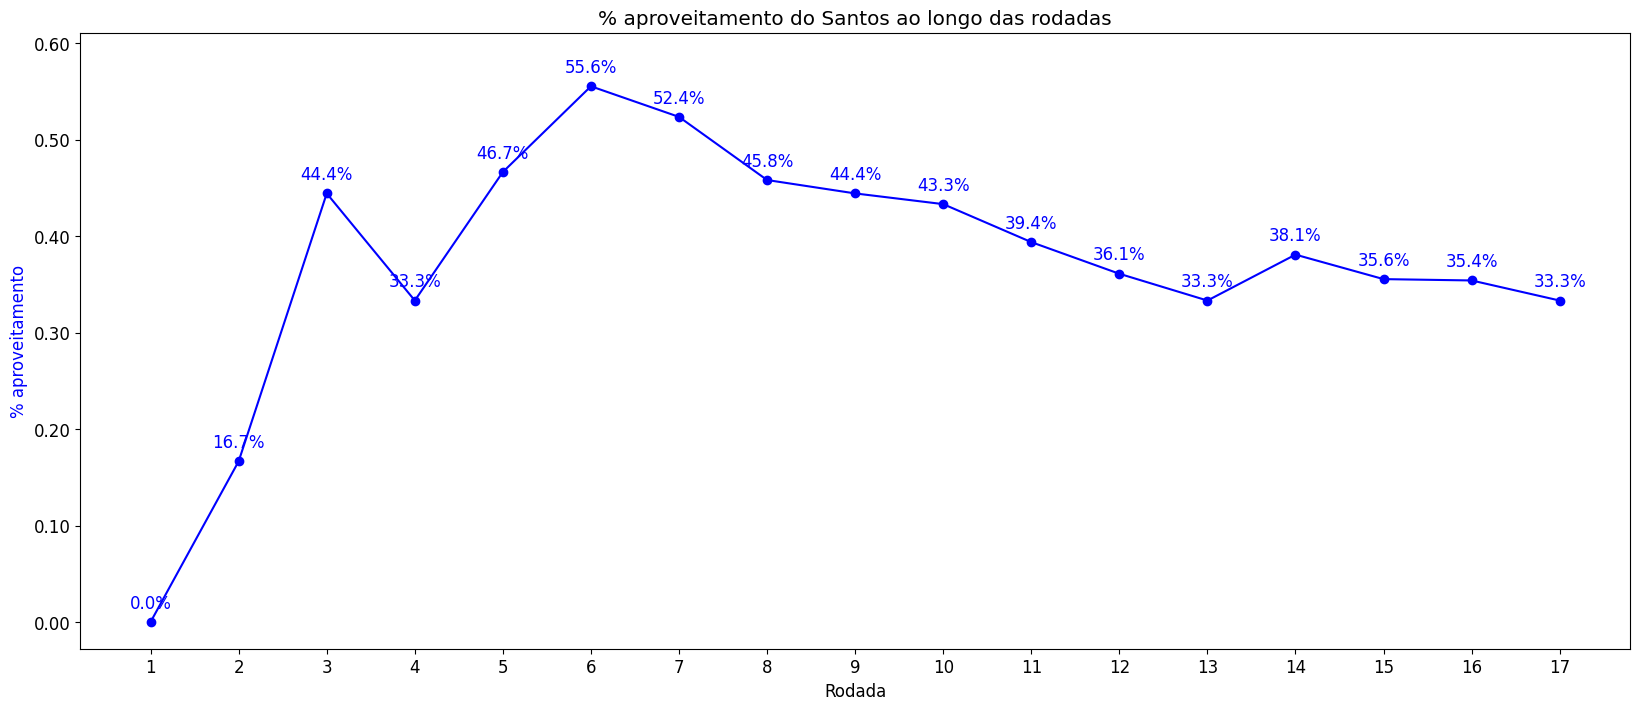

In [402]:
time = "Santos"
# time = "São Paulo"
# time = "Palmeiras"
# time = "Grêmio"
# time = "Internacional"
indicador = "% aproveitamento"
# indicador = "Posição"
# indicador = "Saldo de gols"
# indicador = "Gols pró"
if indicador == "% aproveitamento":
  indicador_formato_eixo_y = "{x:.1%}"
  indicador_formato_y = "{:.1%}"
else:
  indicador_formato_eixo_y = "{x:.0f}"
  indicador_formato_y = "{:.0f}"
indicador_formato_eixo_x = "{x:.0f}"

grafico_indicador_time_rodadas = tabela_brasileirao_serieA_rodadas.loc[
    (tabela_brasileirao_serieA_rodadas["Time"] == time),
    [indicador, "Rodada"]]

grafico_com_rotulos(
    grafico_indicador_time_rodadas, "Rodada", indicador,
    tipo_grafico = "line", titulo_grafico = indicador + " do " + time + " ao longo das rodadas", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1,
    cor_x = "b", rotacao_x = 0,
    formato_eixo_x = indicador_formato_eixo_x, formatador_eixo_x = matplotlib.ticker.StrMethodFormatter, locator_eixo_x = matplotlib.ticker.MultipleLocator(),
    formato_y = indicador_formato_y, rotacao_y = 0, limite_min_y = None, limite_max_y = 1.1,
    xytext_label_y = (0,10),
  )

## Evolução por datas

In [403]:
lista_datas_validas = base_jogos_tratada_duplicada \
  [(base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
  * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ]["Data e Hora"].dt.normalize().sort_values().unique()#.sort()
# display(lista_datas_validas)
# print(lista_datas_validas[0])

tabela_brasileirao_serieA_datas = pd.DataFrame()
temp = base_jogos_tratada_duplicada \
  [(base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
  * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ].copy()

for data in lista_datas_validas:
  # print(data)

  # base_jogos_tratada_duplicada[base_jogos_tratada_duplicada["Data e Hora"].dt.normalize() <= lista_datas_validas[0]]
  tabela_brasileirao_serieA_datas_temp = cria_tabela_brasileirao(
      temp.loc[
        temp["Data e Hora"].dt.normalize() <= data
      ] \
        .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
        .drop_duplicates(ignore_index = True)
    ).reset_index()
  tabela_brasileirao_serieA_datas_temp["Data"] = data


  tabela_brasileirao_serieA_datas = pd.concat([
    tabela_brasileirao_serieA_datas,
    tabela_brasileirao_serieA_datas_temp
  ])

tabela_brasileirao_serieA_datas = tabela_brasileirao_serieA_datas.reset_index().drop("index", axis = 1)

display(tabela_brasileirao_serieA_datas)

tabela_brasileirao_serieA_datas \
  .to_excel(caminho_da_pasta + 'Relatórios/Datas Acumuladas Brasileirão Série A .xlsx')

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Data
0,1,Fluminense,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,2023-04-15
1,2,Athletico PR,6.0,2.0,2.0,0.0,0.0,4.0,0.0,4.0,1.000000,2023-04-15
2,3,Botafogo,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
3,4,Palmeiras,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
4,5,RB Bragantino,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...
849,16,Goiás,30.0,32.0,8.0,6.0,18.0,30.0,52.0,-22.0,0.312500,2023-07-30
850,17,Bahia,30.0,34.0,6.0,12.0,16.0,30.0,46.0,-16.0,0.294118,2023-07-30
851,18,Coritiba,30.0,34.0,6.0,12.0,16.0,34.0,58.0,-24.0,0.294118,2023-07-30
852,19,América-MG,22.0,32.0,4.0,10.0,18.0,34.0,66.0,-32.0,0.229167,2023-07-30


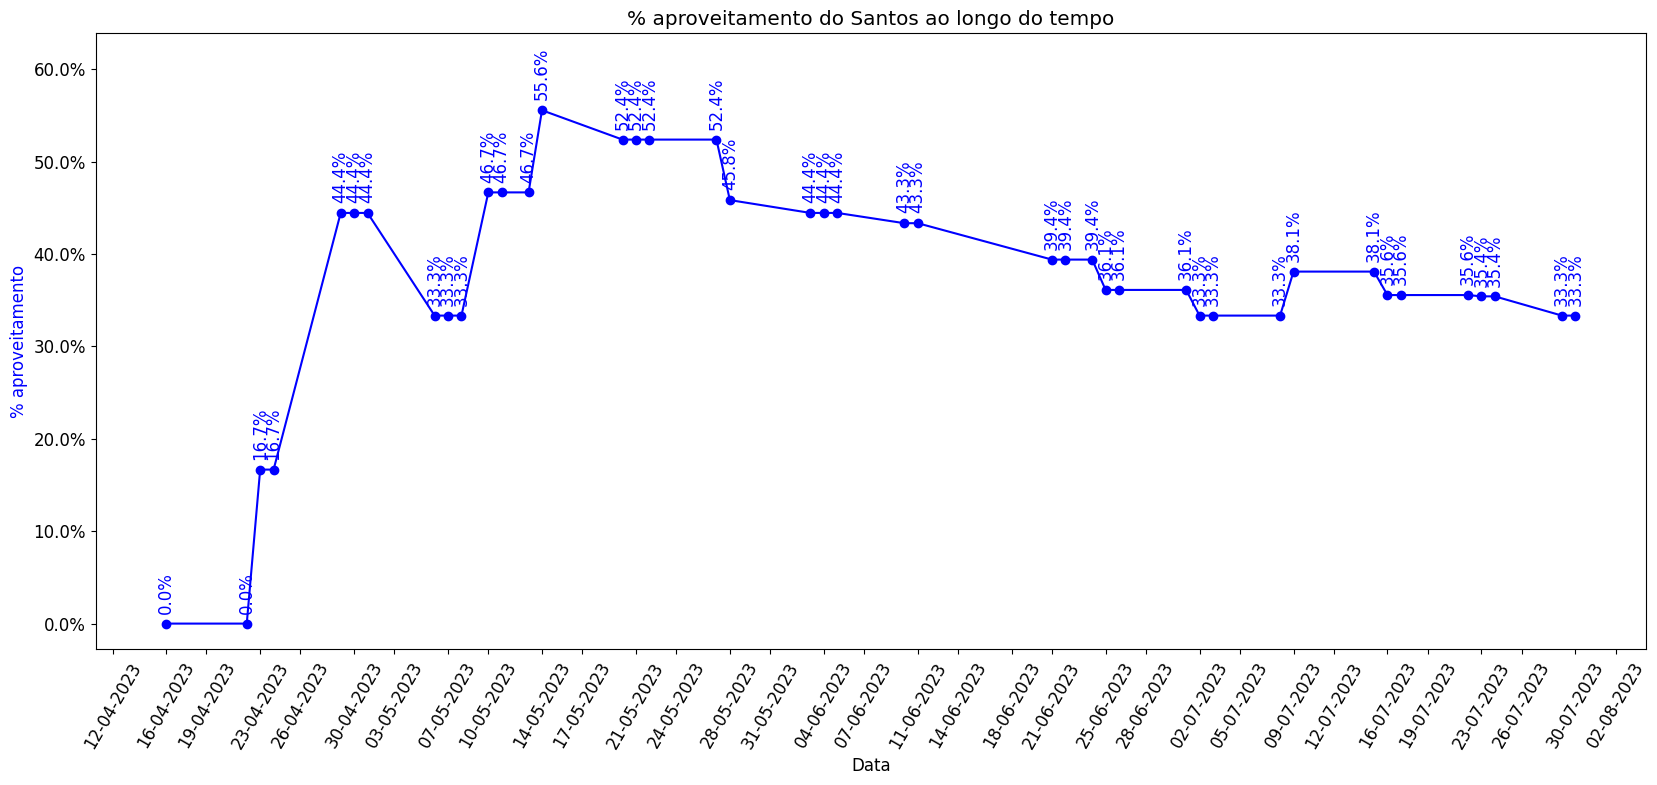

In [404]:
time = "Santos"
# time = "São Paulo"
# time = "Palmeiras"
# time = "Grêmio"
# time = "Internacional"
indicador = "% aproveitamento"
# indicador = "Posição"
# indicador = "Saldo de gols"
# indicador = "Gols pró"
if indicador == "% aproveitamento":
  indicador_formato_eixo_y = "{x:.1%}"
  indicador_formato_y = "{:.1%}"
else:
  indicador_formato_eixo_y = "{x:.0f}"
  indicador_formato_y = "{:.0f}"

indicador_formato_eixo_x = "%d-%m-%Y"
# locator = matplotlib.dates.DayLocator(interval=3) # A cada 3 dias
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
locator = matplotlib.dates.WeekdayLocator(byweekday=(SU, WE)) # A cada dia da semana


# grafico_indicador_time_datas["Data"] = grafico_indicador_time_datas["Data"].
grafico_indicador_time_datas = tabela_brasileirao_serieA_datas.loc[
    (tabela_brasileirao_serieA_datas["Time"] == time),
    [indicador, "Data"]]
grafico_indicador_time_datas["Data"] = grafico_indicador_time_datas["Data"].dt.date


grafico_com_rotulos(
    grafico_indicador_time_datas, "Data", indicador,
    tipo_grafico = "line", titulo_grafico = indicador + " do " + time + " ao longo do tempo", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1,
    cor_x = "b", rotacao_x = 60,
    formato_eixo_x = indicador_formato_eixo_x, formatador_eixo_x = matplotlib.dates.DateFormatter, locator_eixo_x = locator,
    formato_eixo_y = indicador_formato_eixo_y,
    formato_y = indicador_formato_y, rotacao_y = 90,
    limite_min_y = None, limite_max_y = 1.15,
    xytext_label_y = (0,10),
  )

# Tabela de pontos Brasileirão Série B

In [405]:
tabela_brasileirao_serieB = cria_tabela_brasileirao(
    base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série B") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Adversário (nome)", "Mandante ou Visitante", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
)

tabela_brasileirao_serieB

,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento
Posição,,,,,,,,,,
1,Novorizontino,39.0,20.0,12.0,3.0,5.0,25.0,11.0,14.0,0.650000
2,Sport,38.0,20.0,11.0,5.0,4.0,31.0,17.0,14.0,0.633333
3,Vitória,37.0,19.0,12.0,1.0,6.0,29.0,15.0,14.0,0.649123
4,Vila Nova,35.0,20.0,10.0,5.0,5.0,22.0,9.0,13.0,0.583333
5,Criciúma,35.0,20.0,10.0,5.0,5.0,23.0,14.0,9.0,0.583333
6,Mirassol,34.0,20.0,10.0,4.0,6.0,22.0,17.0,5.0,0.566667
7,Juventude,33.0,20.0,10.0,3.0,7.0,23.0,18.0,5.0,0.550000
8,Guarani,33.0,20.0,9.0,6.0,5.0,24.0,15.0,9.0,0.550000
9,Botafogo SP,30.0,19.0,9.0,3.0,7.0,15.0,23.0,-8.0,0.526316


In [406]:
tabela_brasileirao_serieB \
  .to_excel(caminho_da_pasta + 'Relatórios/Tabela Brasileirão Série B.xlsx')

# Tabela de pontos Brasileirão Série C

In [407]:
base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série C") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Adversário (nome)", "Mandante ou Visitante", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)

,index base tratada,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
0,760,02/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,EC São José,Floresta,0-0,Rodada 1,Ida,Brasileirão Série C,2023-05-02 19:00:00,...,0,False,NaN,NaN,NaN,3 - Terça-feira,0.0,0.0,0 x 0,Empate
1,761,02/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Volta Redonda,Pouso Alegre,0-1,Rodada 1,Ida,Brasileirão Série C,2023-05-02 19:00:00,...,0,False,NaN,NaN,NaN,3 - Terça-feira,0.0,1.0,0 x 1,Visitante
2,762,02/05/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Manaus,Náutico,2-1,Rodada 1,Ida,Brasileirão Série C,2023-05-02 21:30:00,...,30,False,NaN,NaN,NaN,3 - Terça-feira,2.0,1.0,2 x 1,Mandante
3,763,03/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,América RN,Erechim,1-2,Rodada 1,Ida,Brasileirão Série C,2023-05-03 19:00:00,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,1.0,2.0,1 x 2,Visitante
4,764,03/05/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Brusque,Amazonas,1-0,Rodada 1,Ida,Brasileirão Série C,2023-05-03 19:00:00,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,1.0,0.0,1 x 0,Mandante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,901,29/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,EC São José,Confiança,2-0,Rodada 15,Volta,Brasileirão Série C,2023-07-29 16:00:00,...,0,False,NaN,NaN,NaN,7 - Sábado,2.0,0.0,2 x 0,Mandante
142,902,29/07/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Volta Redonda,Altos,2-0,Rodada 15,Volta,Brasileirão Série C,2023-07-29 19:00:00,...,0,False,NaN,NaN,NaN,7 - Sábado,2.0,0.0,2 x 0,Mandante
143,903,29/07/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Remo,Erechim,2-1,Rodada 15,Volta,Brasileirão Série C,2023-07-29 19:00:00,...,0,False,NaN,NaN,NaN,7 - Sábado,2.0,1.0,2 x 1,Mandante
144,904,30/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,CSA,Pouso Alegre,2-1,Rodada 15,Volta,Brasileirão Série C,2023-07-30 16:00:00,...,0,False,NaN,NaN,NaN,1 - Domingo,2.0,1.0,2 x 1,Mandante


In [408]:
tabela_brasileirao_serieC = cria_tabela_brasileirao(
    base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série C") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Adversário (nome)", "Mandante ou Visitante", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
)

tabela_brasileirao_serieC

,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento
Posição,,,,,,,,,,
1,Volta Redonda,26.0,15.0,8.0,2.0,5.0,26.0,14.0,12.0,0.577778
2,Brusque,26.0,14.0,8.0,2.0,4.0,20.0,9.0,11.0,0.619048
3,Operário,26.0,15.0,7.0,5.0,3.0,15.0,9.0,6.0,0.577778
4,Amazonas,25.0,14.0,7.0,4.0,3.0,20.0,17.0,3.0,0.595238
5,Botafogo PB,24.0,14.0,6.0,6.0,2.0,18.0,14.0,4.0,0.571429
6,Náutico,24.0,15.0,6.0,6.0,3.0,19.0,16.0,3.0,0.533333
7,EC São José,23.0,15.0,6.0,5.0,4.0,23.0,16.0,7.0,0.511111
8,Paysandu,22.0,15.0,6.0,4.0,5.0,14.0,21.0,-7.0,0.488889
9,CSA,21.0,15.0,5.0,6.0,4.0,14.0,11.0,3.0,0.466667


In [409]:
tabela_brasileirao_serieC \
  .to_excel(caminho_da_pasta + 'Relatórios/Tabela Brasileirão Série C.xlsx')

# Outras análises

## Quantidade de jogos por time em 2023

Torneio,Time (nome),Brasileirão Série A,Carioca 1ª Divisão,Copa do Brasil,Libertadores,Mineiro 1ª Divisão,Mundial de Clubes,Paranaense 1ª Divisão,Paulista A1,Recopa Sul-Americana,Sul-Americana,Supercopa do Brasil,Total Jogos
0,Flamengo,17,15,7,6,0,2,0,0,2,0,1,50
1,Botafogo,17,15,7,0,0,0,0,0,0,8,0,47
2,Athletico PR,17,0,6,6,0,0,17,0,0,0,0,46
3,Palmeiras,17,0,6,6,0,0,0,16,0,0,1,46
4,América-MG,16,0,8,0,12,0,0,0,0,8,0,44
5,Corinthians,16,0,7,6,0,0,0,13,0,2,0,44
6,Atlético-MG,17,0,4,10,12,0,0,0,0,0,0,43
7,São Paulo,17,0,7,0,0,0,0,13,0,6,0,43
8,Fluminense,17,15,4,6,0,0,0,0,0,0,0,42
9,Santos,17,0,6,0,0,0,0,12,0,6,0,41


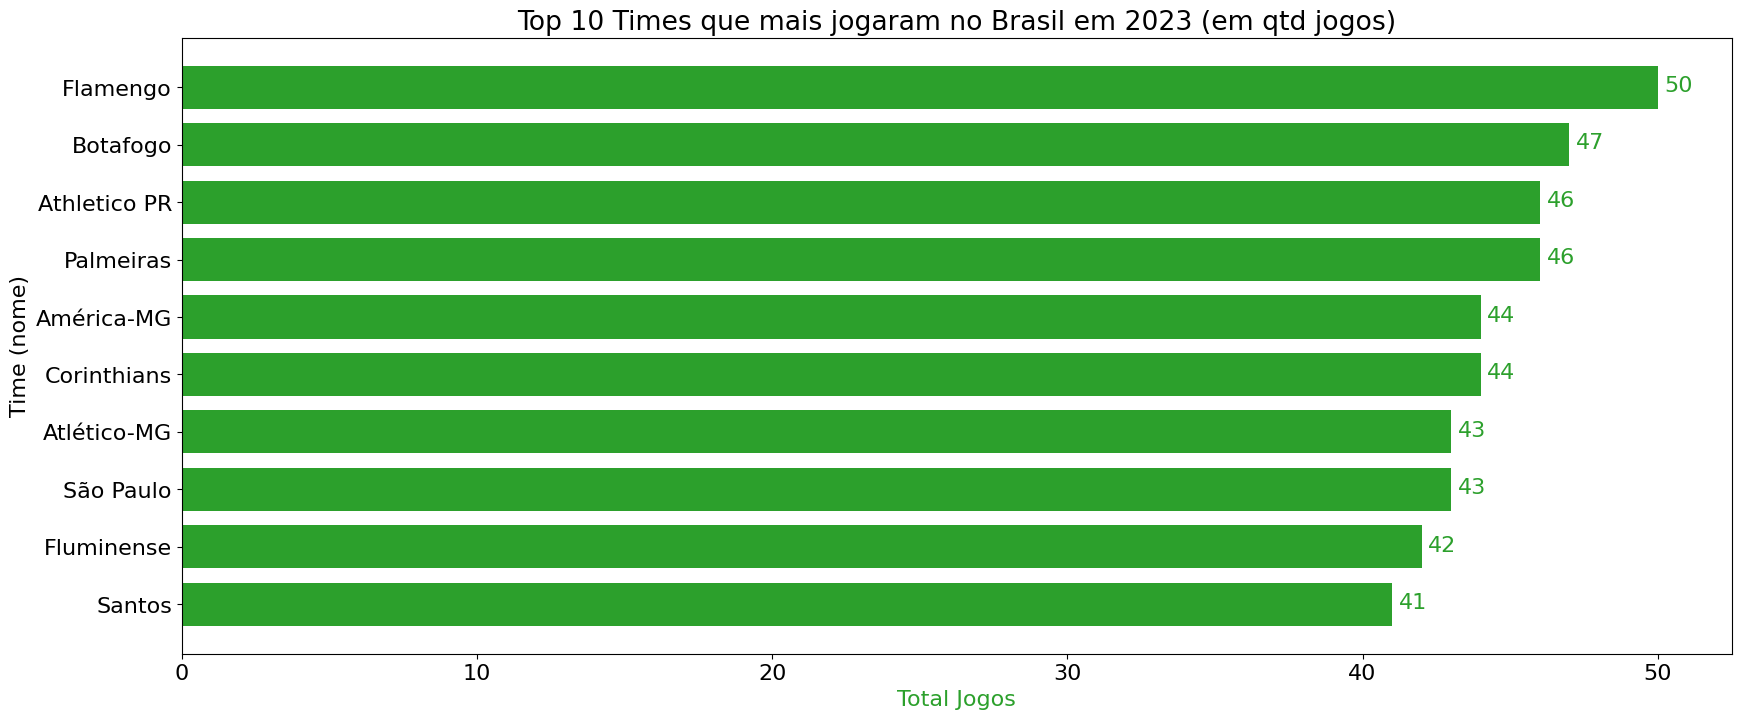

In [497]:
# base_jogos_tratada_duplicada["Time (nome)"].value_counts()

tabela_qtd_jogos = pd.crosstab(
  index = base_jogos_tratada_duplicada.loc[base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu", "Time (nome)"],
  columns = base_jogos_tratada_duplicada.loc[base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu", "Torneio"],
  # margins = True,
)

tabela_qtd_jogos["Total Jogos"] = tabela_qtd_jogos.sum(axis = 1)
tabela_qtd_jogos = tabela_qtd_jogos.sort_values("Total Jogos", ascending = False).head(10)
tabela_qtd_jogos = tabela_qtd_jogos.T
tabela_qtd_jogos["Total por torneio"] = tabela_qtd_jogos.sum(axis = 1)
tabela_qtd_jogos = tabela_qtd_jogos[tabela_qtd_jogos["Total por torneio"] > 0]
tabela_qtd_jogos = tabela_qtd_jogos.T.drop("Total por torneio", axis = 0).reset_index()

display(tabela_qtd_jogos)

grafico_com_rotulos(
    tabela_qtd_jogos, "Time (nome)", "Total Jogos",
    tipo_grafico = "barh", titulo_grafico = "Top 10 Times que mais jogaram no Brasil em 2023 (em qtd jogos)", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 16, grossura_barra = 0.75, cor_barra = "tab:green",
    cor_x = "tab:green", rotacao_x = 0,
    # formato_eixo_x = "{x:.2f}",
    formato_eixo_y = "{x:.0f}",
    formato_y = "{:.0f}", rotacao_y = 0, limite_min_y = None, limite_max_y = None,
    xytext_label_y = (-3,15),
  )

# TO-DO

- [] Sistema de leitura apenas de torneios que ainda não terminaram
  - [] Chave para desligar leitura de torneios que já terminaram
  - [] Substituição das linhas apenas em jogos que foram atualizados
- [] Incluir dados de temperatura e umidade para o local dos jogos passados (e a previsão do futuro como entrada da predição)